## Practice # 4

### Reshaping and pivot tables
- From https://pandas.pydata.org/docs/user_guide/reshaping.html
- pandas provides methods for manipulating a Series and DataFrame to alter the representation of the data for further data processing or data summarization.
    - pivot() and pivot_table(): Group unique values within one or more discrete categories.
    - stack() and unstack(): Pivot a column or row level to the opposite axis respectively.
    - melt() and wide_to_long(): Unpivot a wide DataFrame to a long format.
    - get_dummies() and from_dummies(): Conversions with indicator variables.
    - explode(): Convert a column of list-like values to individual rows.
    - crosstab(): Calculate a cross-tabulation of multiple 1 dimensional factor arrays.
    - cut(): Transform continuous variables to discrete, categorical values
    - factorize(): Encode 1 dimensional variables into integer labels.
- pivot() and pivot_table()
#### pivot()
- Data is often stored in so-called “stacked” or “record” format. In a “record” or “wide” format, typically there is one row for each subject. In the “stacked” or “long” format there are multiple rows for each subject where applicable.

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = {
   "value": range(12),
   "variable": ["A"] * 3 + ["B"] * 3 + ["C"] * 3 + ["D"] * 3,
   "date": pd.to_datetime(["2020-01-03", "2020-01-04", "2020-01-05"] * 4)
}

df = pd.DataFrame(data)

- To perform time series operations with each unique variable, a better representation would be where the columns are the unique variables and an index of dates identifies individual observations. To reshape the data into this form, we use the DataFrame.pivot() method (also implemented as a top level function pivot()):

In [4]:
pivoted = df.pivot(index="date", columns="variable", values="value")
pivoted

variable,A,B,C,D
date,,,,
2020-01-03,0,3,6,9
2020-01-04,1,4,7,10
2020-01-05,2,5,8,11


- If the values argument is omitted, and the input DataFrame has more than one column of values which are not used as column or index inputs to pivot(), then the resulting “pivoted” DataFrame will have hierarchical columns whose topmost level indicates the respective value column:



In [5]:
df["value2"] = df["value"] * 2

pivoted = df.pivot(index="date", columns="variable")

pivoted

value           value2            
variable       A  B  C   D      A   B   C   D
date                                         
2020-01-03     0  3  6   9      0   6  12  18
2020-01-04     1  4  7  10      2   8  14  20
2020-01-05     2  5  8  11      4  10  16  22

In [6]:
pivoted["value2"]

variable,A,B,C,D
date,,,,
2020-01-03,0,6,12,18
2020-01-04,2,8,14,20
2020-01-05,4,10,16,22


- **Note**: that this returns a view on the underlying data in the case where the data are homogeneously-typed.
- **Note**: pivot() can only handle unique rows specified by index and columns. If you data contains duplicates, use pivot_table().

#### pivot_table()
- While pivot() provides general purpose pivoting with various data types, pandas also provides pivot_table() or pivot_table() for pivoting with aggregation of numeric data.

- The function pivot_table() can be used to create spreadsheet-style pivot tables. See the cookbook for some advanced strategies.

In [7]:
import datetime

df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["A", "B", "C"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": np.random.randn(24),
        "E": np.random.randn(24),
        "F": [datetime.datetime(2013, i, 1) for i in range(1, 13)]
        + [datetime.datetime(2013, i, 15) for i in range(1, 13)],
    }
)
df

,A,B,C,D,E,F
0,one,A,foo,1.475922,0.358120,2013-01-01
1,one,B,foo,-0.439127,1.184666,2013-02-01
2,two,C,foo,1.242710,-0.840081,2013-03-01
3,three,A,bar,0.864652,-0.942337,2013-04-01
4,one,B,bar,2.722265,0.473041,2013-05-01
5,one,C,bar,-1.489115,-0.480747,2013-06-01
6,two,A,foo,-0.762764,2.120878,2013-07-01
7,three,B,foo,1.559838,1.261172,2013-08-01
8,one,C,foo,-0.315945,0.694752,2013-09-01
9,one,A,bar,0.766877,-0.634820,2013-10-01


In [8]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.036858 -0.092916
      B  0.720667  0.022449
      C -0.735529  0.030459
three A  0.144155       NaN
      B       NaN  0.864243
      C -1.527816       NaN
two   A       NaN -0.304739
      B -0.543246       NaN
      C       NaN  0.414714

In [9]:
pd.pivot_table(
    df, values=["D", "E"],
    index=["B"],
    columns=["A", "C"],
    aggfunc="sum",
)

D                                                           E  \
A       one               three                 two                 one   
C       bar       foo       bar       foo       bar       foo       bar   
B                                                                         
A -0.073716 -0.185833  0.288311       NaN       NaN -0.609477 -0.085979   
B  1.441334  0.044898       NaN  1.728487 -1.086492       NaN -0.832302   
C -1.471057  0.060918 -3.055632       NaN       NaN  0.829428  0.102689   

                                                     
A               three                 two            
C       foo       bar       foo       bar       foo  
B                                                    
A  0.538976 -0.726068       NaN       NaN  2.884978  
B  1.343233       NaN  1.671844 -2.749137       NaN  
C -0.381505 -3.410785       NaN       NaN -1.117148

In [10]:
pd.pivot_table(
    df, values="E",
    index=["B", "C"],
    columns=["A"],
    aggfunc=["sum", "mean"],
)

sum                          mean                    
A           one     three       two       one     three       two
B C                                                              
A bar -0.085979 -0.726068       NaN -0.042989 -0.363034       NaN
  foo  0.538976       NaN  2.884978  0.269488       NaN  1.442489
B bar -0.832302       NaN -2.749137 -0.416151       NaN -1.374569
  foo  1.343233  1.671844       NaN  0.671616  0.835922       NaN
C bar  0.102689 -3.410785       NaN  0.051345 -1.705393       NaN
  foo -0.381505       NaN -1.117148 -0.190752       NaN -0.558574

- The result is a DataFrame potentially having a MultiIndex on the index or column. If the values column name is not given, the pivot table will include all of the data in an additional level of hierarchy in the columns:

In [11]:
pd.pivot_table(df[["A", "B", "C", "D", "E"]], index=["A", "B"], columns=["C"])

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.036858 -0.092916 -0.042989  0.269488
      B  0.720667  0.022449 -0.416151  0.671616
      C -0.735529  0.030459  0.051345 -0.190752
three A  0.144155       NaN -0.363034       NaN
      B       NaN  0.864243       NaN  0.835922
      C -1.527816       NaN -1.705393       NaN
two   A       NaN -0.304739       NaN  1.442489
      B -0.543246       NaN -1.374569       NaN
      C       NaN  0.414714       NaN -0.558574

- Also, you can use Grouper for index and columns keywords. For detail of Grouper, see Grouping with a Grouper specification.

In [12]:
pd.pivot_table(df, values="D", index=pd.Grouper(freq="ME", key="F"), columns="C")


C,bar,foo
F,,
2013-01-31,NaN,-0.092916
2013-02-28,NaN,0.022449
2013-03-31,NaN,0.414714
2013-04-30,0.144155,NaN
2013-05-31,0.720667,NaN
2013-06-30,-0.735529,NaN
2013-07-31,NaN,-0.304739
2013-08-31,NaN,0.864243
2013-09-30,NaN,0.030459


#### Adding margins
- Passing margins=True to pivot_table() will add a row and column with an All label with partial group aggregates across the categories on the rows and columns:

In [13]:
table = df.pivot_table(
    index=["A", "B"],
    columns="C",
    values=["D", "E"],
    margins=True,
    aggfunc="std"
)

table

D                             E                    
C             bar       foo       All       bar       foo       All
A     B                                                            
one   A  1.136653  2.218672  1.439633  0.836975  0.125345  0.520859
      B  2.830686  0.652767  1.724954  1.257507  0.725562  1.047378
      C  1.065732  0.489889  0.808808  0.752492  1.252292  0.855003
three A  1.018937       NaN  1.018937  0.819258       NaN  0.819258
      B       NaN  0.983719  0.983719       NaN  0.601394  0.601394
      C  0.368683       NaN  0.368683  0.982601       NaN  0.982601
two   A       NaN  0.647746  0.647746       NaN  0.959387  0.959387
      B  2.064985       NaN  2.064985  0.485166       NaN  0.485166
      C       NaN  1.170963  1.170963       NaN  0.398110  0.398110
All      1.414135  0.958208  1.207071  0.953073  0.895457  1.052352

- Additionally, you can call DataFrame.stack() to display a pivoted DataFrame as having a multi-level index:

In [14]:
table.stack(future_stack=True)

D         E
A     B C                      
one   A bar  1.136653  0.836975
        foo  2.218672  0.125345
        All  1.439633  0.520859
      B bar  2.830686  1.257507
        foo  0.652767  0.725562
        All  1.724954  1.047378
      C bar  1.065732  0.752492
        foo  0.489889  1.252292
        All  0.808808  0.855003
three A bar  1.018937  0.819258
        foo       NaN       NaN
        All  1.018937  0.819258
      B bar       NaN       NaN
        foo  0.983719  0.601394
        All  0.983719  0.601394
      C bar  0.368683  0.982601
        foo       NaN       NaN
        All  0.368683  0.982601
two   A bar       NaN       NaN
        foo  0.647746  0.959387
        All  0.647746  0.959387
      B bar  2.064985  0.485166
        foo       NaN       NaN
        All  2.064985  0.485166
      C bar       NaN       NaN
        foo  1.170963  0.398110
        All  1.170963  0.398110
All     bar  1.414135  0.953073
        foo  0.958208  0.895457
        All  1.207071  1.052352

#### stack() and unstack()
- Closely related to the pivot() method are the related stack() and unstack() methods available on Series and DataFrame. These methods are designed to work together with MultiIndex objects (see the section on hierarchical indexing).

- stack(): “pivot” a level of the (possibly hierarchical) column labels, returning a DataFrame with an index with a new inner-most level of row labels.
- unstack(): (inverse operation of stack()) “pivot” a level of the (possibly hierarchical) row index to the column axis, producing a reshaped DataFrame with a new inner-most level of column labels.

In [15]:
tuples = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.138233 -0.619201
      two     0.466124 -2.085698
baz   one    -0.587338 -1.255150
      two    -0.300674 -0.324786

- The stack() function “compresses” a level in the DataFrame columns to produce either:
    - A Series, in the case of a Index in the columns.
    - A DataFrame, in the case of a MultiIndex in the columns.

- If the columns have a MultiIndex, you can choose which level to stack. The stacked level becomes the new lowest level in a MultiIndex on the columns:

In [16]:
stacked = df2.stack(future_stack=True)
stacked

first  second   
bar    one     A   -0.138233
               B   -0.619201
       two     A    0.466124
               B   -2.085698
baz    one     A   -0.587338
               B   -1.255150
       two     A   -0.300674
               B   -0.324786
dtype: float64

- With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [17]:
stacked.unstack()

A         B
first second                    
bar   one    -0.138233 -0.619201
      two     0.466124 -2.085698
baz   one    -0.587338 -1.255150
      two    -0.300674 -0.324786

In [18]:
stacked.unstack(1)


second        one       two
first                      
bar   A -0.138233  0.466124
      B -0.619201 -2.085698
baz   A -0.587338 -0.300674
      B -1.255150 -0.324786

In [19]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.138233 -0.587338
       B -0.619201 -1.255150
two    A  0.466124 -0.300674
       B -2.085698 -0.324786

- If the indexes have names, you can use the level names instead of specifying the level numbers:

In [20]:
stacked.unstack("second")

second        one       two
first                      
bar   A -0.138233  0.466124
      B -0.619201 -2.085698
baz   A -0.587338 -0.300674
      B -1.255150 -0.324786

- Notice that the stack() and unstack() methods implicitly sort the index levels involved. Hence a call to stack() and then unstack(), or vice versa, will result in a sorted copy of the original DataFrame or Series:

In [21]:
index = pd.MultiIndex.from_product([[2, 1], ["a", "b"]])
df = pd.DataFrame(np.random.randn(4), index=index, columns=["A"])
df

A
2 a  0.587278
  b -1.348399
1 a -0.446988
  b -0.958634

In [22]:
all(df.unstack().stack(future_stack=True) == df.sort_index())

True

#### Multiple levels
- You may also stack or unstack more than one level at a time by passing a list of levels, in which case the end result is as if each level in the list were processed individually.

In [25]:
columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat", "long"),
        ("B", "cat", "long"),
        ("A", "dog", "short"),
        ("B", "dog", "short"),
    ],
    names=["exp", "animal", "hair_length"],
)
df = pd.DataFrame(np.random.randn(4, 4), columns=columns)
df


exp,A,B,A,B
animal,cat,cat,dog,dog
hair_length,long,long,short,short
0,0.244950,-0.412987,0.602607,0.213989
1,0.248846,0.849297,-1.205057,0.436823
2,-1.322249,0.153067,1.231653,-0.807758
3,1.978517,0.034359,0.343929,-0.834265


In [26]:
df.stack(level=["animal", "hair_length"], future_stack=True)

exp                          A         B
  animal hair_length                    
0 cat    long         0.244950 -0.412987
  dog    short        0.602607  0.213989
1 cat    long         0.248846  0.849297
  dog    short       -1.205057  0.436823
2 cat    long        -1.322249  0.153067
  dog    short        1.231653 -0.807758
3 cat    long         1.978517  0.034359
  dog    short        0.343929 -0.834265

- The list of levels can contain either level names or level numbers but not a mixture of the two.

In [27]:
# df.stack(level=['animal', 'hair_length'], future_stack=True)
# from above is equivalent to:
df.stack(level=[1, 2], future_stack=True)

exp                          A         B
  animal hair_length                    
0 cat    long         0.244950 -0.412987
  dog    short        0.602607  0.213989
1 cat    long         0.248846  0.849297
  dog    short       -1.205057  0.436823
2 cat    long        -1.322249  0.153067
  dog    short        1.231653 -0.807758
3 cat    long         1.978517  0.034359
  dog    short        0.343929 -0.834265

#### Missing data
- Unstacking can result in missing values if subgroups do not have the same set of labels. By default, missing values will be replaced with the default fill value for that data type.

In [28]:
columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat"),
        ("B", "dog"),
        ("B", "cat"),
        ("A", "dog"),
    ],
    names=["exp", "animal"],
)

index = pd.MultiIndex.from_product(
    [("bar", "baz", "foo", "qux"), ("one", "two")], names=["first", "second"]
)

df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns)

df3 = df.iloc[[0, 1, 4, 7], [1, 2]]
df3

exp                  B          
animal             dog       cat
first second                    
bar   one     0.435403  2.975306
      two     1.230510  1.114754
foo   one     0.546684  1.584556
qux   two     1.579409  0.488771

In [29]:
df3.unstack()

exp            B                              
animal       dog                 cat          
second       one       two       one       two
first                                         
bar     0.435403  1.230510  2.975306  1.114754
foo     0.546684       NaN  1.584556       NaN
qux          NaN  1.579409       NaN  0.488771

- The missing value can be filled with a specific value with the fill_value argument.

In [30]:
df3.unstack(fill_value=-1e9)

exp                B                                          
animal           dog                         cat              
second           one           two           one           two
first                                                         
bar     4.354027e-01  1.230510e+00  2.975306e+00  1.114754e+00
foo     5.466837e-01 -1.000000e+09  1.584556e+00 -1.000000e+09
qux    -1.000000e+09  1.579409e+00 -1.000000e+09  4.887713e-01

#### melt() and wide_to_long()
- The top-level melt() function and the corresponding DataFrame.melt() are useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are “unpivoted” to the row axis, leaving just two non-identifier columns, “variable” and “value”. The names of those columns can be customized by supplying the var_name and value_name parameters.

In [31]:
cheese = pd.DataFrame(
    {
        "first": ["John", "Mary"],
        "last": ["Doe", "Bo"],
        "height": [5.5, 6.0],
        "weight": [130, 150],
    }
)


cheese

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


In [32]:
cheese.melt(id_vars=["first", "last"])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [33]:
cheese.melt(id_vars=["first", "last"], var_name="quantity")

,first,last,quantity,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


- When transforming a DataFrame using melt(), the index will be ignored. The original index values can be kept by setting the ignore_index=False parameter to False (default is True). ignore_index=False will however duplicate index values.

In [34]:
index = pd.MultiIndex.from_tuples([("person", "A"), ("person", "B")])
cheese = pd.DataFrame(
    {
        "first": ["John", "Mary"],
        "last": ["Doe", "Bo"],
        "height": [5.5, 6.0],
        "weight": [130, 150],
    },
    index=index,
)
cheese

first last  height  weight
person A  John  Doe     5.5     130
       B  Mary   Bo     6.0     150

In [35]:
cheese.melt(id_vars=["first", "last"])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [36]:
cheese.melt(id_vars=["first", "last"], ignore_index=False)

first last variable  value
person A  John  Doe   height    5.5
       B  Mary   Bo   height    6.0
       A  John  Doe   weight  130.0
       B  Mary   Bo   weight  150.0

- wide_to_long() is similar to melt() with more customization for column matching.

In [37]:
dft = pd.DataFrame(
    {
        "A1970": {0: "a", 1: "b", 2: "c"},
        "A1980": {0: "d", 1: "e", 2: "f"},
        "B1970": {0: 2.5, 1: 1.2, 2: 0.7},
        "B1980": {0: 3.2, 1: 1.3, 2: 0.1},
        "X": dict(zip(range(3), np.random.randn(3))),
    }
)
dft["id"] = dft.index
dft

,A1970,A1980,B1970,B1980,X,id
0,a,d,2.5,3.2,0.774597,0
1,b,e,1.2,1.3,1.300085,1
2,c,f,0.7,0.1,0.414967,2


In [38]:
pd.wide_to_long(dft, ["A", "B"], i="id", j="year")

,,X,A,B
id,year,,,
0,1970,0.774597,a,2.5
1,1970,1.300085,b,1.2
2,1970,0.414967,c,0.7
0,1980,0.774597,d,3.2
1,1980,1.300085,e,1.3
2,1980,0.414967,f,0.1


#### get_dummies() and from_dummies()
- To convert categorical variables of a Series into a “dummy” or “indicator”, get_dummies() creates a new DataFrame with columns of the unique variables and the values representing the presence of those variables per row.

In [39]:
df = pd.DataFrame({"key": list("bbacab"), "data1": range(6)})
pd.get_dummies(df["key"])
df["key"].str.get_dummies()

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


- prefix adds a prefix to the the column names which is useful for merging the result with the original DataFrame:

In [40]:
dummies = pd.get_dummies(df["key"], prefix="key")
dummies

,key_a,key_b,key_c
0,False,True,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False


In [41]:
df[["data1"]].join(dummies)

,data1,key_a,key_b,key_c
0,0,False,True,False
1,1,False,True,False
2,2,True,False,False
3,3,False,False,True
4,4,True,False,False
5,5,False,True,False


- This function is often used along with discretization functions like cut():

In [42]:
values = np.random.randn(10)
values

array([-0.07596469,  0.22910282, -0.18143502,  0.23746114, -2.12503148,
       -0.08434902, -0.98649492, -0.77709514,  2.52381155,  0.29076973])

In [43]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,False,False,False,False,False
1,False,True,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,True,False,False,False


- get_dummies() also accepts a DataFrame. By default, object, string, or categorical type columns are encoded as dummy variables with other columns unaltered.

In [45]:
df = pd.DataFrame({"A": ["a", "b", "a"], "B": ["c", "c", "b"], "C": [1, 2, 3]})
pd.get_dummies(df)

,C,A_a,A_b,B_b,B_c
0,1,True,False,False,True
1,2,False,True,False,True
2,3,True,False,True,False


- Specifying the columns keyword will encode a column of any type.

In [46]:
pd.get_dummies(df, columns=["A"])

,B,C,A_a,A_b
0,c,1,True,False
1,c,2,False,True
2,b,3,True,False


- As with the Series version, you can pass values for the prefix and prefix_sep. By default the column name is used as the prefix and _ as the prefix separator. You can specify prefix and prefix_sep in 3 ways:
    - string: Use the same value for prefix or prefix_sep for each column to be encoded.
    - list: Must be the same length as the number of columns being encoded.
    - dict: Mapping column name to prefix.

In [47]:
simple = pd.get_dummies(df, prefix="new_prefix")
simple

,C,new_prefix_a,new_prefix_b,new_prefix_b,new_prefix_c
0,1,True,False,False,True
1,2,False,True,False,True
2,3,True,False,True,False


In [48]:
from_list = pd.get_dummies(df, prefix=["from_A", "from_B"])
from_list

,C,from_A_a,from_A_b,from_B_b,from_B_c
0,1,True,False,False,True
1,2,False,True,False,True
2,3,True,False,True,False


In [49]:
from_dict = pd.get_dummies(df, prefix={"B": "from_B", "A": "from_A"})
from_dict

,C,from_A_a,from_A_b,from_B_b,from_B_c
0,1,True,False,False,True
1,2,False,True,False,True
2,3,True,False,True,False


- To avoid collinearity when feeding the result to statistical models, specify drop_first=True.

In [50]:
s = pd.Series(list("abcaa"))
pd.get_dummies(s)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False
4,True,False,False


In [51]:
pd.get_dummies(s, drop_first=True)


,b,c
0,False,False
1,True,False
2,False,True
3,False,False
4,False,False


- When a column contains only one level, it will be omitted in the result.

In [52]:
df = pd.DataFrame({"A": list("aaaaa"), "B": list("ababc")})
pd.get_dummies(df)

,A_a,B_a,B_b,B_c
0,True,True,False,False
1,True,False,True,False
2,True,True,False,False
3,True,False,True,False
4,True,False,False,True


In [53]:
pd.get_dummies(df, drop_first=True)

,B_b,B_c
0,False,False
1,True,False
2,False,False
3,True,False
4,False,True


- The values can be cast to a different type using the dtype argument.

In [54]:
df = pd.DataFrame({"A": list("abc"), "B": [1.1, 2.2, 3.3]})
pd.get_dummies(df, dtype=np.float32).dtypes

B      float64
A_a    float32
A_b    float32
A_c    float32
dtype: object

- from_dummies() converts the output of get_dummies() back into a Series of categorical values from indicator values.

In [55]:
df = pd.DataFrame({"prefix_a": [0, 1, 0], "prefix_b": [1, 0, 1]})
df

,prefix_a,prefix_b
0,0,1
1,1,0
2,0,1


In [56]:
pd.from_dummies(df, sep="_")

,prefix
0,b
1,a
2,b


- Dummy coded data only requires k - 1 categories to be included, in this case the last category is the default category. The default category can be modified with default_category.

In [57]:
df = pd.DataFrame({"prefix_a": [0, 1, 0]})
df

,prefix_a
0,0
1,1
2,0


In [58]:
pd.from_dummies(df, sep="_", default_category="b")

,prefix
0,b
1,a
2,b


#### explode()
- For a DataFrame column with nested, list-like values, explode() will transform each list-like value to a separate row. The resulting Index will be duplicated corresponding to the index label from the original row:

In [59]:
keys = ["panda1", "panda2", "panda3"]
values = [["eats", "shoots"], ["shoots", "leaves"], ["eats", "leaves"]]
df = pd.DataFrame({"keys": keys, "values": values})
df

,keys,values
0,panda1,"[eats, shoots]"
1,panda2,"[shoots, leaves]"
2,panda3,"[eats, leaves]"


In [60]:
df["values"].explode()

0      eats
0    shoots
1    shoots
1    leaves
2      eats
2    leaves
Name: values, dtype: object

- DataFrame.explode can also explode the column in the DataFrame.

In [62]:
df.explode("values")

,keys,values
0,panda1,eats
0,panda1,shoots
1,panda2,shoots
1,panda2,leaves
2,panda3,eats
2,panda3,leaves


- Series.explode() will replace empty lists with a missing value indicator and preserve scalar entries.

In [63]:
s = pd.Series([[1, 2, 3], "foo", [], ["a", "b"]])
s

0    [1, 2, 3]
1          foo
2           []
3       [a, b]
dtype: object

In [64]:
s.explode()

0      1
0      2
0      3
1    foo
2    NaN
3      a
3      b
dtype: object

- A comma-separated string value can be split into individual values in a list and then exploded to a new row.

In [65]:
df = pd.DataFrame([{"var1": "a,b,c", "var2": 1}, {"var1": "d,e,f", "var2": 2}])

df.assign(var1=df.var1.str.split(",")).explode("var1")

,var1,var2
0,a,1
0,b,1
0,c,1
1,d,2
1,e,2
1,f,2


#### crosstab()
- Use crosstab() to compute a cross-tabulation of two (or more) factors. By default crosstab() computes a frequency table of the factors unless an array of values and an aggregation function are passed.

- Any Series passed will have their name attributes used unless row or column names for the cross-tabulation are specified

In [66]:
a = np.array(["foo", "foo", "bar", "bar", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "two", "one", "two", "one"], dtype=object)
c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny"], dtype=object)
pd.crosstab(a, [b, c], rownames=["a"], colnames=["b", "c"])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     0    0     1
foo    2     1    1     0

- If crosstab() receives only two Series, it will provide a frequency table.

In [68]:
df = pd.DataFrame(
    {"A": [1, 2, 2, 2, 2], "B": [3, 3, 4, 4, 4], "C": [1, 1, np.nan, 1, 1]}
)
df

,A,B,C
0,1,3,1.0
1,2,3,1.0
2,2,4,NaN
3,2,4,1.0
4,2,4,1.0


In [69]:
pd.crosstab(df["A"], df["B"])

B,3,4
A,,
1,1,0
2,1,3


- crosstab() can also summarize to Categorical data.

In [70]:
foo = pd.Categorical(["a", "b"], categories=["a", "b", "c"])
bar = pd.Categorical(["d", "e"], categories=["d", "e", "f"])
pd.crosstab(foo, bar)

col_0,d,e
row_0,,
a,1,0
b,0,1


- For Categorical data, to include all of data categories even if the actual data does not contain any instances of a particular category, use dropna=False.

In [71]:
pd.crosstab(foo, bar, dropna=False)

col_0,d,e,f
row_0,,,
a,1,0,0
b,0,1,0
c,0,0,0


#### Normalization
- Frequency tables can also be normalized to show percentages rather than counts using the normalize argument:

In [72]:
pd.crosstab(df["A"], df["B"], normalize=True)

B,3,4
A,,
1,0.2,0.0
2,0.2,0.6


- normalize can also normalize values within each row or within each column:

In [73]:
pd.crosstab(df["A"], df["B"], normalize="columns")

B,3,4
A,,
1,0.5,0.0
2,0.5,1.0


- crosstab() can also accept a third Series and an aggregation function (aggfunc) that will be applied to the values of the third Series within each group defined by the first two Series:

In [74]:
pd.crosstab(df["A"], df["B"], values=df["C"], aggfunc="sum")

B,3,4
A,,
1,1.0,NaN
2,1.0,2.0


#### Adding margins
- margins=True will add a row and column with an All label with partial group aggregates across the categories on the rows and columns:

In [75]:
pd.crosstab(
    df["A"], df["B"], values=df["C"], aggfunc="sum", normalize=True, margins=True
)


B,3,4,All
A,,,
1,0.25,0.0,0.25
2,0.25,0.5,0.75
All,0.50,0.5,1.00


#### cut()
- The cut() function computes groupings for the values of the input array and is often used to transform continuous variables to discrete or categorical variables:

- An integer bins will form equal-width bins.

In [76]:
ages = np.array([10, 15, 13, 12, 23, 25, 28, 59, 60])
pd.cut(ages, bins=3)

[(9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (9.95, 26.667], (26.667, 43.333], (43.333, 60.0], (43.333, 60.0]]
Categories (3, interval[float64, right]): [(9.95, 26.667] < (26.667, 43.333] < (43.333, 60.0]]

- A list of ordered bin edges will assign an interval for each variable.

In [77]:
pd.cut(ages, bins=[0, 18, 35, 70])

[(0, 18], (0, 18], (0, 18], (0, 18], (18, 35], (18, 35], (18, 35], (35, 70], (35, 70]]
Categories (3, interval[int64, right]): [(0, 18] < (18, 35] < (35, 70]]

- If the bins keyword is an IntervalIndex, then these will be used to bin the passed data.

#### factorize()
- factorize() encodes 1 dimensional values into integer labels. Missing values are encoded as -1.

In [78]:
x = pd.Series(["A", "A", np.nan, "B", 3.14, np.inf])
x

0       A
1       A
2     NaN
3       B
4    3.14
5     inf
dtype: object

In [79]:
labels, uniques = pd.factorize(x)
labels

array([ 0,  0, -1,  1,  2,  3])

In [80]:
uniques

Index(['A', 'B', 3.14, inf], dtype='object')

- Categorical will similarly encode 1 dimensional values for further categorical operations

In [81]:
pd.Categorical(x)

['A', 'A', NaN, 'B', 3.14, inf]
Categories (4, object): [3.14, inf, 'A', 'B']

### Working with text data
- From https://pandas.pydata.org/docs/user_guide/text.html

#### Text data types
- There are two ways to store text data in pandas:
    1. object - dtype Numpy array.
    2. StringDtype extension type.
- We recommend using StringDtype to store text data.
- Prior to pandas 1.0, object dtype was the only option. This was unfortunate for many reasons:
    - You can accidentally store a mixture of strings and non-strings in an object dtype array. It’s better to have a dedicated dtype.
    - object dtype breaks dtype-specific operations like DataFrame.select_dtypes(). There isn’t a clear way to select just text while excluding non-text but still object-dtype columns.
    - When reading code, the contents of an object dtype array is less clear than 'string'.

- Currently, the performance of object dtype arrays of strings and arrays.StringArray are about the same. We expect future enhancements to significantly increase the performance and lower the memory overhead of StringArray.

- **Warning**: StringArray is currently considered experimental. The implementation and parts of the API may change without warning.

- For backwards-compatibility, object dtype remains the default type we infer a list of strings to

In [82]:
pd.Series(["a", "b", "c"])

0    a
1    b
2    c
dtype: object

- To explicitly request string dtype, specify the dtype

In [83]:
pd.Series(["a", "b", "c"], dtype="string")

0    a
1    b
2    c
dtype: string

In [84]:
pd.Series(["a", "b", "c"], dtype=pd.StringDtype())

0    a
1    b
2    c
dtype: string

- Or astype after the Series or DataFrame is created

In [85]:
s = pd.Series(["a", "b", "c"])
s

0    a
1    b
2    c
dtype: object

In [86]:
 s.astype("string")

0    a
1    b
2    c
dtype: string

- You can also use StringDtype/"string" as the dtype on non-string data and it will be converted to string dtype:

In [87]:
s = pd.Series(["a", 2, np.nan], dtype="string")
s

0       a
1       2
2    <NA>
dtype: string

In [88]:
type(s[1])

str

- or convert from existing pandas data:

In [89]:
s1 = pd.Series([1, 2, np.nan], dtype="Int64")
s1

0       1
1       2
2    <NA>
dtype: Int64

In [90]:
s2 = s1.astype("string")
s2

0       1
1       2
2    <NA>
dtype: string

In [91]:
type(s2[0])

str

#### Behavior differences
- These are places where the behavior of StringDtype objects differ from object dtype

1. For StringDtype, string accessor methods that return numeric output will always return a nullable integer dtype, rather than either int or float dtype, depending on the presence of NA values. Methods returning boolean output will return a nullable boolean dtype.

In [92]:
s = pd.Series(["a", None, "b"], dtype="string")
s

0       a
1    <NA>
2       b
dtype: string

In [93]:
s.str.count("a")


0       1
1    <NA>
2       0
dtype: Int64

In [94]:
s.dropna().str.count("a")

0    1
2    0
dtype: Int64

- Both outputs are Int64 dtype. Compare that with object-dtype

In [95]:
s2 = pd.Series(["a", None, "b"], dtype="object")
s2.str.count("a")

0    1.0
1    NaN
2    0.0
dtype: float64

In [96]:
s2.dropna().str.count("a")

0    1
2    0
dtype: int64

- When NA values are present, the output dtype is float64. Similarly for methods returning boolean values.

In [97]:
s.str.isdigit()

0    False
1     <NA>
2    False
dtype: boolean

In [98]:
s.str.match("a")

0     True
1     <NA>
2    False
dtype: boolean

3. Some string methods, like Series.str.decode() are not available on StringArray because StringArray only holds strings, not bytes.

4. In comparison operations, arrays.StringArray and Series backed by a StringArray will return an object with BooleanDtype, rather than a bool dtype object. Missing values in a StringArray will propagate in comparison operations, rather than always comparing unequal like numpy.nan.

- Everything else that follows in the rest of this document applies equally to string and object dtype.

#### String methods
- Series and Index are equipped with a set of string processing methods that make it easy to operate on each element of the array. Perhaps most importantly, these methods exclude missing/NA values automatically. These are accessed via the str attribute and generally have names matching the equivalent (scalar) built-in string methods:

In [99]:
s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string"
)
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5    <NA>
6    caba
7     dog
8     cat
dtype: string

In [100]:
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5    <NA>
6    CABA
7     DOG
8     CAT
dtype: string

In [101]:
s.str.len()

0       1
1       1
2       1
3       4
4       4
5    <NA>
6       4
7       3
8       3
dtype: Int64

In [102]:
idx = pd.Index([" jack", "jill ", " jesse ", "frank"])
idx.str.strip()

Index(['jack', 'jill', 'jesse', 'frank'], dtype='object')

In [103]:
idx.str.lstrip()

Index(['jack', 'jill ', 'jesse ', 'frank'], dtype='object')

In [104]:
idx.str.rstrip()

Index([' jack', 'jill', ' jesse', 'frank'], dtype='object')

- The string methods on Index are especially useful for cleaning up or transforming DataFrame columns. For instance, you may have columns with leading or trailing whitespace:

In [105]:
df = pd.DataFrame(
    np.random.randn(3, 2), columns=[" Column A ", " Column B "], index=range(3)
)
df

,Column A,Column B
0,-0.608195,0.211936
1,0.987422,-0.971529
2,1.556240,0.413825


- Since df.columns is an Index object, we can use the .str accessor

In [106]:
df.columns.str.strip()


Index(['Column A', 'Column B'], dtype='object')

In [107]:
df.columns.str.lower()

Index([' column a ', ' column b '], dtype='object')

- These string methods can then be used to clean up the columns as needed. Here we are removing leading and trailing whitespaces, lower casing all names, and replacing any remaining whitespaces with underscores:

In [108]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df

,column_a,column_b
0,-0.608195,0.211936
1,0.987422,-0.971529
2,1.556240,0.413825


- **Note**: If you have a Series where lots of elements are repeated (i.e. the number of unique elements in the Series is a lot smaller than the length of the Series), it can be faster to convert the original Series to one of type category and then use .str.<method> or .dt.<property> on that. The performance difference comes from the fact that, for Series of type category, the string operations are done on the .categories and not on each element of the Series.

- Please note that a Series of type category with string .categories has some limitations in comparison to Series of type string (e.g. you can’t add strings to each other: s + " " + s won’t work if s is a Series of type category). Also, .str methods which operate on elements of type list are not available on such a Series.

- **Warning**: The type of the Series is inferred and the allowed types (i.e. strings).

- Generally speaking, the .str accessor is intended to work only on strings. With very few exceptions, other uses are not supported, and may be disabled at a later point.

#### Splitting and replacing strings
- Methods like split return a Series of lists:

In [109]:
s2 = pd.Series(["a_b_c", "c_d_e", np.nan, "f_g_h"], dtype="string")
s2.str.split("_")

0    [a, b, c]
1    [c, d, e]
2         <NA>
3    [f, g, h]
dtype: object

- Elements in the split lists can be accessed using get or [] notation:

In [110]:
s2.str.split("_").str.get(1)

0       b
1       d
2    <NA>
3       g
dtype: object

In [111]:
s2.str.split("_").str[1]

0       b
1       d
2    <NA>
3       g
dtype: object

- It is easy to expand this to return a DataFrame using expand.

In [112]:
s2.str.split("_", expand=True)

,0,1,2
0,a,b,c
1,c,d,e
2,<NA>,<NA>,<NA>
3,f,g,h


- When original Series has StringDtype, the output columns will all be StringDtype as well.
- It is also possible to limit the number of splits:

In [113]:
s2.str.split("_", expand=True, n=1)

,0,1
0,a,b_c
1,c,d_e
2,<NA>,<NA>
3,f,g_h


- rsplit is similar to split except it works in the reverse direction, i.e., from the end of the string to the beginning of the string:

In [114]:
s2.str.rsplit("_", expand=True, n=1)

,0,1
0,a_b,c
1,c_d,e
2,<NA>,<NA>
3,f_g,h


- replace optionally uses regular expressions:

In [115]:
s3 = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", "", np.nan, "CABA", "dog", "cat"],
    dtype="string",
)
s3

0       A
1       B
2       C
3    Aaba
4    Baca
5        
6    <NA>
7    CABA
8     dog
9     cat
dtype: string

In [116]:
s3.str.replace("^.a|dog", "XX-XX ", case=False, regex=True)

0           A
1           B
2           C
3    XX-XX ba
4    XX-XX ca
5            
6        <NA>
7    XX-XX BA
8      XX-XX 
9     XX-XX t
dtype: string

- Single character pattern with regex=True will also be treated as regular expressions:

In [117]:
s4 = pd.Series(["a.b", ".", "b", np.nan, ""], dtype="string")
s4

0     a.b
1       .
2       b
3    <NA>
4        
dtype: string

In [118]:
s4.str.replace(".", "a", regex=True)

0     aaa
1       a
2       a
3    <NA>
4        
dtype: string

- If you want literal replacement of a string (equivalent to str.replace()), you can set the optional regex parameter to False, rather than escaping each character. In this case both pat and repl must be strings:

In [119]:
dollars = pd.Series(["12", "-$10", "$10,000"], dtype="string")

# These lines are equivalent
dollars.str.replace(r"-\$", "-", regex=True)

0         12
1        -10
2    $10,000
dtype: string

In [120]:
dollars.str.replace("-$", "-", regex=False)

0         12
1        -10
2    $10,000
dtype: string

- The replace method can also take a callable as replacement. It is called on every pat using re.sub(). The callable should expect one positional argument (a regex object) and return a string.

In [121]:
# Reverse every lowercase alphabetic word
pat = r"[a-z]+"

def repl(m):
    return m.group(0)[::-1]

pd.Series(["foo 123", "bar baz", np.nan], dtype="string").str.replace(
    pat, repl, regex=True
)


0    oof 123
1    rab zab
2       <NA>
dtype: string

In [123]:
# Using regex groups
pat = r"(?P<one>\w+) (?P<two>\w+) (?P<three>\w+)"

def repl(m):
    return m.group("two").swapcase()

pd.Series(["Foo Bar Baz", np.nan], dtype="string").str.replace(
    pat, repl, regex=True
)



0     bAR
1    <NA>
dtype: string

- The replace method also accepts a compiled regular expression object from re.compile() as a pattern. All flags should be included in the compiled regular expression object.

In [124]:
import re

regex_pat = re.compile(r"^.a|dog", flags=re.IGNORECASE)
s3.str.replace(regex_pat, "XX-XX", regex=True)


0          A
1          B
2          C
3    XX-XXba
4    XX-XXca
5           
6       <NA>
7    XX-XXBA
8      XX-XX
9     XX-XXt
dtype: string

- Including a flags argument when calling replace with a compiled regular expression object will raise a ValueError.
`s3.str.replace(regex_pat, 'XX-XX ', flags=re.IGNORECASE)`
`ValueError`
- removeprefix and removesuffix have the same effect as str.removeprefix and str.removesuffix added in Python 3.9 <https://docs.python.org/3/library/stdtypes.html#str.removeprefix>`__:

In [125]:
s = pd.Series(["str_foo", "str_bar", "no_prefix"])
s.str.removeprefix("str_")

0          foo
1          bar
2    no_prefix
dtype: object

In [127]:
s = pd.Series(["foo_str", "bar_str", "no_suffix"])
s.str.removesuffix("_str")

0          foo
1          bar
2    no_suffix
dtype: object

#### Concatenation
- There are several ways to concatenate a Series or Index, either with itself or others, all based on cat(), resp. Index.str.cat.

#### Concatenating a single Series into a string
- The content of a Series (or Index) can be concatenated:

In [128]:
s = pd.Series(["a", "b", "c", "d"], dtype="string")
s.str.cat(sep=",")

'a,b,c,d'

- If not specified, the keyword sep for the separator defaults to the empty string, sep='':

In [129]:
s.str.cat()

'abcd'

- By default, missing values are ignored. Using na_rep, they can be given a representation:

In [130]:
t = pd.Series(["a", "b", np.nan, "d"], dtype="string")
s.str.cat(sep=",")

'a,b,c,d'

In [131]:
t.str.cat(sep=",", na_rep="-")

'a,b,-,d'

#### Concatenating a Series and something list-like into a Series
- The first argument to cat() can be a list-like object, provided that it matches the length of the calling Series (or Index).

In [132]:
s.str.cat(["A", "B", "C", "D"])

0    aA
1    bB
2    cC
3    dD
dtype: string

- Missing values on either side will result in missing values in the result as well, unless na_rep is specified:

In [133]:
s.str.cat(t)

0      aa
1      bb
2    <NA>
3      dd
dtype: string

In [134]:
s.str.cat(t, na_rep="-")

0    aa
1    bb
2    c-
3    dd
dtype: string

#### Concatenating a Series and something array-like into a Series
- The parameter others can also be two-dimensional. In this case, the number or rows must match the lengths of the calling Series (or Index).

In [135]:
d = pd.concat([t, s], axis=1)
s

0    a
1    b
2    c
3    d
dtype: string

In [136]:
d

,0,1
0,a,a
1,b,b
2,<NA>,c
3,d,d


In [137]:
s.str.cat(d, na_rep="-")

0    aaa
1    bbb
2    c-c
3    ddd
dtype: string

#### Concatenating a Series and an indexed object into a Series, with alignment
- For concatenation with a Series or DataFrame, it is possible to align the indexes before concatenation by setting the join-keyword.

In [138]:
u = pd.Series(["b", "d", "a", "c"], index=[1, 3, 0, 2], dtype="string")
s

0    a
1    b
2    c
3    d
dtype: string

In [139]:
s.str.cat(u)

0    aa
1    bb
2    cc
3    dd
dtype: string

In [140]:
s.str.cat(u, join="left")

0    aa
1    bb
2    cc
3    dd
dtype: string

- The usual options are available for join (one of 'left', 'outer', 'inner', 'right'). In particular, alignment also means that the different lengths do not need to coincide anymore.

In [141]:
v = pd.Series(["z", "a", "b", "d", "e"], index=[-1, 0, 1, 3, 4], dtype="string")
s

0    a
1    b
2    c
3    d
dtype: string

In [142]:
v

-1    z
 0    a
 1    b
 3    d
 4    e
dtype: string

In [143]:
s.str.cat(v, join="left", na_rep="-")

0    aa
1    bb
2    c-
3    dd
dtype: string

In [144]:
s.str.cat(v, join="outer", na_rep="-")

-1    -z
 0    aa
 1    bb
 2    c-
 3    dd
 4    -e
dtype: string

- The same alignment can be used when others is a DataFrame:

In [145]:
f = d.loc[[3, 2, 1, 0], :]
s

0    a
1    b
2    c
3    d
dtype: string

In [146]:
f

,0,1
3,d,d
2,<NA>,c
1,b,b
0,a,a


In [147]:
s.str.cat(f, join="left", na_rep="-")

0    aaa
1    bbb
2    c-c
3    ddd
dtype: string

#### Concatenating a Series and many objects into a Series
- Several array-like items (specifically: Series, Index, and 1-dimensional variants of np.ndarray) can be combined in a list-like container (including iterators, dict-views, etc.).

In [148]:
s

0    a
1    b
2    c
3    d
dtype: string

In [149]:
u

1    b
3    d
0    a
2    c
dtype: string

In [150]:
s.str.cat([u, u.to_numpy()], join="left")

0    aab
1    bbd
2    cca
3    ddc
dtype: string

- All elements without an index (e.g. np.ndarray) within the passed list-like must match in length to the calling Series (or Index), but Series and Index may have arbitrary length (as long as alignment is not disabled with join=None):

In [151]:
v

-1    z
 0    a
 1    b
 3    d
 4    e
dtype: string

In [152]:
s.str.cat([v, u, u.to_numpy()], join="outer", na_rep="-")

-1    -z--
0     aaab
1     bbbd
2     c-ca
3     dddc
4     -e--
dtype: string

- If using join='right' on a list-like of others that contains different indexes, the union of these indexes will be used as the basis for the final concatenation:

In [153]:
u.loc[[3]]

3    d
dtype: string

In [154]:
v.loc[[-1, 0]]

-1    z
 0    a
dtype: string

In [155]:
s.str.cat([u.loc[[3]], v.loc[[-1, 0]]], join="right", na_rep="-")

 3    dd-
-1    --z
 0    a-a
dtype: string

#### Indexing with .str
- You can use [] notation to directly index by position locations. If you index past the end of the string, the result will be a NaN.

In [156]:
s = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string"
)
s.str[0]

0       A
1       B
2       C
3       A
4       B
5    <NA>
6       C
7       d
8       c
dtype: string

In [157]:
s.str[1]

0    <NA>
1    <NA>
2    <NA>
3       a
4       a
5    <NA>
6       A
7       o
8       a
dtype: string

### Extracting substrings
#### Extract first match in each subject (extract)
- The extract method accepts a regular expression with at least one capture group.

- Extracting a regular expression with more than one group returns a DataFrame with one column per group.

In [158]:
pd.Series(
    ["a1", "b2", "c3"],
    dtype="string",
).str.extract(r"([ab])(\d)", expand=False)

,0,1
0,a,1
1,b,2
2,<NA>,<NA>


- Elements that do not match return a row filled with NaN. Thus, a Series of messy strings can be “converted” into a like-indexed Series or DataFrame of cleaned-up or more useful strings, without necessitating get() to access tuples or re.match objects. The dtype of the result is always object, even if no match is found and the result only contains NaN.

- Named groups like

In [159]:
pd.Series(["a1", "b2", "c3"], dtype="string").str.extract(
    r"(?P<letter>[ab])(?P<digit>\d)", expand=False
)

,letter,digit
0,a,1
1,b,2
2,<NA>,<NA>


- and optional groups like

In [160]:
pd.Series(
    ["a1", "b2", "3"],
    dtype="string",
).str.extract(r"([ab])?(\d)", expand=False)

,0,1
0,a,1
1,b,2
2,<NA>,3


- can also be used. Note that any capture group names in the regular expression will be used for column names; otherwise capture group numbers will be used.

- Extracting a regular expression with one group returns a DataFrame with one column if expand=True.

In [161]:
pd.Series(["a1", "b2", "c3"], dtype="string").str.extract(r"[ab](\d)", expand=True)


,0
0,1
1,2
2,<NA>


- It returns a Series if expand=False.

In [162]:
pd.Series(["a1", "b2", "c3"], dtype="string").str.extract(r"[ab](\d)", expand=False)


0       1
1       2
2    <NA>
dtype: string

- Calling on an Index with a regex with exactly one capture group returns a DataFrame with one column if expand=True.

In [163]:
s = pd.Series(["a1", "b2", "c3"], ["A11", "B22", "C33"], dtype="string")

s

A11    a1
B22    b2
C33    c3
dtype: string

In [164]:
s.index.str.extract("(?P<letter>[a-zA-Z])", expand=True)

,letter
0,A
1,B
2,C


- It returns an Index if expand=False.

In [165]:
s.index.str.extract("(?P<letter>[a-zA-Z])", expand=False)

Index(['A', 'B', 'C'], dtype='object', name='letter')

- Calling on an Index with a regex with more than one capture group returns a DataFrame if expand=True.

In [166]:
s.index.str.extract("(?P<letter>[a-zA-Z])([0-9]+)", expand=True)

,letter,1
0,A,11
1,B,22
2,C,33


- It raises ValueError if expand=False.

In [167]:
# s.index.str.extract("(?P<letter>[a-zA-Z])([0-9]+)", expand=False) # ValueError

- The table below summarizes the behavior of extract(expand=False) (input subject in first column, number of groups in regex in first row)

|  |1 group | >1 group |
| ------------- | ------- | -------- |
| Index | Index | ValueError |
| Series | Series | DataFrame |

#### Extract all matches in each subject (extractall)
- Unlike extract (which returns only the first match),

In [168]:
s = pd.Series(["a1a2", "b1", "c1"], index=["A", "B", "C"], dtype="string")
s

A    a1a2
B      b1
C      c1
dtype: string

In [169]:
two_groups = "(?P<letter>[a-z])(?P<digit>[0-9])"
s.str.extract(two_groups, expand=True)

,letter,digit
A,a,1
B,b,1
C,c,1


In [170]:
s.str.extract(two_groups, expand=True)

,letter,digit
A,a,1
B,b,1
C,c,1


- the extractall method returns every match. The result of extractall is always a DataFrame with a MultiIndex on its rows. The last level of the MultiIndex is named match and indicates the order in the subject.

In [171]:
s.str.extractall(two_groups)

letter digit
  match             
A 0          a     1
  1          a     2
B 0          b     1
C 0          c     1

- When each subject string in the Series has exactly one match,

In [172]:
s = pd.Series(["a3", "b3", "c2"], dtype="string")
s

0    a3
1    b3
2    c2
dtype: string

- then extractall(pat).xs(0, level='match') gives the same result as extract(pat).

In [173]:
extract_result = s.str.extract(two_groups, expand=True)
extract_result

,letter,digit
0,a,3
1,b,3
2,c,2


In [174]:
extractall_result = s.str.extractall(two_groups)
extractall_result

,,letter,digit
,match,,
0,0,a,3
1,0,b,3
2,0,c,2


In [175]:
extractall_result.xs(0, level="match")

,letter,digit
0,a,3
1,b,3
2,c,2


- Index also supports .str.extractall. It returns a DataFrame which has the same result as a Series.str.extractall with a default index (starts from 0).

In [176]:
pd.Index(["a1a2", "b1", "c1"]).str.extractall(two_groups)


letter digit
  match             
0 0          a     1
  1          a     2
1 0          b     1
2 0          c     1

In [177]:
pd.Series(["a1a2", "b1", "c1"], dtype="string").str.extractall(two_groups)

letter digit
  match             
0 0          a     1
  1          a     2
1 0          b     1
2 0          c     1

#### Testing for strings that match or contain a pattern
- You can check whether elements contain a pattern:

In [178]:
pattern = r"[0-9][a-z]"

pd.Series(
    ["1", "2", "3a", "3b", "03c", "4dx"],
    dtype="string",
).str.contains(pattern)

0    False
1    False
2     True
3     True
4     True
5     True
dtype: boolean

- Or whether elements match a pattern:

In [179]:
pd.Series(
    ["1", "2", "3a", "3b", "03c", "4dx"],
    dtype="string",
).str.match(pattern)

0    False
1    False
2     True
3     True
4    False
5     True
dtype: boolean

In [180]:
pd.Series(
    ["1", "2", "3a", "3b", "03c", "4dx"],
    dtype="string",
).str.fullmatch(pattern)

0    False
1    False
2     True
3     True
4    False
5    False
dtype: boolean

- **Note**: - The distinction between match, fullmatch, and contains is strictness: fullmatch tests whether the entire string matches the regular expression; match tests whether there is a match of the regular expression that begins at the first character of the string; and contains tests whether there is a match of the regular expression at any position within the string.

- The corresponding functions in the re package for these three match modes are re.fullmatch, re.match, and re.search, respectively.

- Methods like match, fullmatch, contains, startswith, and endswith take an extra na argument so missing values can be considered True or False:

In [181]:
s4 = pd.Series(
    ["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string"
)
s4.str.contains("A", na=False)

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
dtype: boolean

#### Creating indicator variables
- You can extract dummy variables from string columns. For example if they are separated by a '|':

In [182]:
s = pd.Series(["a", "a|b", np.nan, "a|c"], dtype="string")
s.str.get_dummies(sep="|")

,a,b,c
0,1,0,0
1,1,1,0
2,0,0,0
3,1,0,1


- String Index also supports get_dummies which returns a MultiIndex.

In [183]:
idx = pd.Index(["a", "a|b", np.nan, "a|c"])
idx.str.get_dummies(sep="|")

MultiIndex([(1, 0, 0),
            (1, 1, 0),
            (0, 0, 0),
            (1, 0, 1)],
           names=['a', 'b', 'c'])

#### Method summary

| Method | Description |
| ------- | ---------- |
| cat() | Concatenate strings |
| split() | Split strings on delimiter |
| rsplit() | Split strings on delimiter working from the end of the string |
| get() | Index into each element (retrieve i-th element) |
| join() | Join strings in each element of the Series with passed separator |
| get_dummies() | Split strings on the delimiter returning DataFrame of dummy variables |
| contains() | Return boolean array if each string contains pattern/regex |
| replace() | Replace occurrences of pattern/regex/string with some other string or the return value of a callable given the occurrence |
| removeprefix() | Remove prefix from string i.e. only remove if string starts with prefix. |
| removesuffix() | Remove suffix from string i.e. only remove if string ends with suffix. |
| repeat() | Duplicate values (s.str.repeat(3) equivalent to x * 3) |
| pad() | Add whitespace to the sides of strings |
| center() | Equivalent to str.center |
| ljust() | Equivalent to str.ljust |
| rjust() | Equivalent to str.rjust |
| zfill() | Equivalent to str.zfill |
| wrap() | Split long strings into lines with length less than a given width |
| slice() | Slice each string in the Series  |
| slice_replace() | Replace slice in each string with passed value |
| count() | Count occurrences of pattern |
| startswith() | Equivalent to str.startswith(pat) for each element |
| endswith() | Equivalent to str.endswith(pat) for each element |
| findall() | Compute list of all occurrences of pattern/regex for each string |
| match() | Call re.match on each element returning matched groups as list |
| extract() | Call re.search on each element returning DataFrame with one row for each element and one column for each regex capture group |
| extractall() | Call re.findall on each element returning DataFrame with one row for each match and one column for each regex capture group |
| len() | Compute string lengths |
| strip() | Equivalent to str.strip |
| rstrip() | Equivalent to str.rstrip |
| lstrip() | Equivalent to str.lstrip |
| partition() | Equivalent to str.partition |
| rpartition() | Equivalent to str.rpartition |
| lower() | Equivalent to str.lower |
| casefold() | Equivalent to str.casefold |
| upper() | Equivalent to str.upper |
| find() | Equivalent to str.find |
| rfind() | Equivalent to str.rfind |
| index() | Equivalent to str.index |
| rindex() | Equivalent to str.rindex |
| capitalize() | Equivalent to str.capitalize
| swapcase() | Equivalent to str.swapcase |
| normalize() | Return Unicode normal form. Equivalent to unicodedata.normalize |
| translate() | Equivalent to str.translate |
| isalnum() | Equivalent to str.isalnum |
| isalpha() | Equivalent to str.isalpha |
| isdigit() | Equivalent to str.isdigit |
| isspace() | Equivalent to str.isspace |
| islower() | Equivalent to str.islower |
| isupper() | Equivalent to str.isupper |
| istitle() | Equivalent to str.istitle |
| isnumeric() | Equivalent to str.isnumeric |
| isdecimal() | Equivalent to str.isdecimal |


### Working with missing data
- From https://pandas.pydata.org/docs/user_guide/missing_data.html
#### Values considered "missing"
- pandas uses different sentinel values to represent a missing (also referred to as NA) depending on the data type.
- **numpy.nan** for Numpy data types. The disadvantage of using Numpy data types is that the original data type will be coerced to **np.float64** or **object**.

In [184]:
pd.Series([1, 2], dtype=np.int64).reindex([0, 1, 2])

0    1.0
1    2.0
2    NaN
dtype: float64

In [185]:
pd.Series([True, False], dtype=np.bool_).reindex([0, 1, 2])

0     True
1    False
2      NaN
dtype: object

- NaT for NumPy np.datetime64, np.timedelta64, and PeriodDtype. For typing applications, use api.types.NaTType.

In [186]:
pd.Series([1, 2], dtype=np.dtype("timedelta64[ns]")).reindex([0, 1, 2])

0   0 days 00:00:00.000000001
1   0 days 00:00:00.000000002
2                         NaT
dtype: timedelta64[ns]

In [187]:
pd.Series([1, 2], dtype=np.dtype("datetime64[ns]")).reindex([0, 1, 2])

0   1970-01-01 00:00:00.000000001
1   1970-01-01 00:00:00.000000002
2                             NaT
dtype: datetime64[ns]

In [188]:
pd.Series(["2020", "2020"], dtype=pd.PeriodDtype("D")).reindex([0, 1, 2])

0    2020-01-01
1    2020-01-01
2           NaT
dtype: period[D]

- NA for StringDtype, Int64Dtype (and other bit widths), Float64Dtype`(and other bit widths), :class:`BooleanDtype and ArrowDtype. These types will maintain the original data type of the data. For typing applications, use api.types.NAType.

In [189]:
pd.Series([1, 2], dtype="Int64").reindex([0, 1, 2])

0       1
1       2
2    <NA>
dtype: Int64

In [190]:
pd.Series([True, False], dtype="boolean[pyarrow]").reindex([0, 1, 2])

0     True
1    False
2     <NA>
dtype: bool[pyarrow]

To detect these missing value, use the isna() or notna() methods.

In [192]:
ser = pd.Series([pd.Timestamp("2020-01-01"), pd.NaT])
ser

0   2020-01-01
1          NaT
dtype: datetime64[ns]

- **Note**: isna() or notna() will also consider None a missing value.

In [193]:
ser = pd.Series([1, None], dtype=object)
ser

0       1
1    None
dtype: object

In [194]:
pd.isna(ser)

0    False
1     True
dtype: bool

- **Warning** - Equality compaisons between np.nan, NaT, and NA do not act like None

In [196]:
None == None  # noqa: E711

True

In [197]:
np.nan == np.nan

False

In [198]:
pd.NaT == pd.NaT


False

In [199]:
pd.NA == pd.NA

<NA>

- Therefore, an equality comparison between a DataFrame or Series with one of these missing values does not provide the same information as isna() or notna().

In [200]:
ser = pd.Series([True, None], dtype="boolean[pyarrow]")
ser == pd.NA

0    <NA>
1    <NA>
dtype: bool[pyarrow]

In [201]:
pd.isna(ser)

0    False
1     True
dtype: bool

#### NA semantics
- **Warning**: Experimental: the behaviour of NA` can still change without warning.

- Starting from pandas 1.0, an experimental NA value (singleton) is available to represent scalar missing values. The goal of NA is provide a “missing” indicator that can be used consistently across data types (instead of np.nan, None or pd.NaT depending on the data type).

- For example, when having missing values in a Series with the nullable integer dtype, it will use NA:

In [202]:
s = pd.Series([1, 2, None], dtype="Int64")
s

0       1
1       2
2    <NA>
dtype: Int64

In [203]:
s[2]

<NA>

In [204]:
s[2] is pd.NA

True

- Currently, pandas does not yet use those data types using NA by default a DataFrame or Series, so you need to specify the dtype explicitly. An easy way to convert to those dtypes is explained in the conversion section.

#### Propagation in arithmetic and comparison operations
In general, missing values propagate in operations involving NA. When one of the operands is unknown, the outcome of the operation is also unknown.

- For example, NA propagates in arithmetic operations, similarly to np.nan:

In [205]:
pd.NA + 1

<NA>

In [206]:
"a" * pd.NA

<NA>

- There are a few special cases when the result is known, even when one of the operands is NA.

In [207]:
pd.NA ** 0

1

In [208]:
1 ** pd.NA

1

- In equality and comparison operations, NA also propagates. This deviates from the behaviour of np.nan, where comparisons with np.nan always return False.

In [209]:
pd.NA == 1

<NA>

In [210]:
pd.NA == pd.NA

<NA>

In [211]:
pd.NA < 2.5

<NA>

- To check if a value is equal to NA, use isna()

In [212]:
pd.isna(pd.NA)

True

- **Note**: An exception on this basic propagation rule are reductions (such as the mean or the minimum), where pandas defaults to skipping missing values. See the calculation section for more.

#### Logical operations
- For logical operations, NA follows the rules of the three-valued logic (or Kleene logic, similarly to R, SQL and Julia). This logic means to only propagate missing values when it is logically required.

- For example, for the logical “or” operation (|), if one of the operands is True, we already know the result will be True, regardless of the other value (so regardless the missing value would be True or False). In this case, NA does not propagate:

In [213]:
True | False

True

In [214]:
True | pd.NA

True

In [215]:
pd.NA | True

True

- On the other hand, if one of the operands is False, the result depends on the value of the other operand. Therefore, in this case NA propagates:

In [216]:
False | True

True

In [217]:
False | False

False

In [218]:
False | pd.NA

<NA>

- The behaviour of the logical “and” operation (&) can be derived using similar logic (where now NA will not propagate if one of the operands is already False):

In [219]:
False & True

False

In [220]:
False & False

False

In [221]:
False & pd.NA

False

In [222]:
True & True

True

In [223]:
True & False

False

In [224]:
True & pd.NA

<NA>

#### NA in a boolean context
- Since the actual value of an NA is unknown, it is ambiguous to convert NA to a boolean value.

In [225]:
# bool(pd.NA) # TypeError

- This also means that NA cannot be used in a context where it is evaluated to a boolean, such as if condition: ... where condition can potentially be NA. In such cases, isna() can be used to check for NA or condition being NA can be avoided, for example by filling missing values beforehand.

- A similar situation occurs when using Series or DataFrame objects in if statements, see Using if/truth statements with pandas.

#### NumPy ufuncs
- pandas.NA implements NumPy’s __array_ufunc__ protocol. Most ufuncs work with NA, and generally return NA:

In [226]:
np.log(pd.NA)

<NA>

In [227]:
np.add(pd.NA, 1)

<NA>

- **Warning**: Currently, ufuncs involving an ndarray and NA will return an object-dtype filled with NA values.

In [228]:
a = np.array([1, 2, 3])
np.greater(a, pd.NA)

array([<NA>, <NA>, <NA>], dtype=object)

- The return type here may change to return a different array type in the future.

#### Conversion
- If you have a DataFrame or Series using np.nan, Series.convert_dtypes() and DataFrame.convert_dtypes() in DataFrame that can convert data to use the data types that use NA such as Int64Dtype or ArrowDtype. This is especially helpful after reading in data sets from IO methods where data types were inferred.

- In this example, while the dtypes of all columns are changed, we show the results for the first 10 columns.

In [229]:
import io

data = io.StringIO("a,b\n,True\n2,")
df = pd.read_csv(data)
df.dtypes

a    float64
b     object
dtype: object

In [231]:
df_conv = df.convert_dtypes()
df_conv

,a,b
0,<NA>,True
1,2,<NA>


In [232]:
df_conv.dtypes

a      Int64
b    boolean
dtype: object

#### Inserting missing data
- You can insert missing values by simply assigning to a Series or DataFrame. The missing value sentinel used will be chosen based on the dtype.

In [233]:
ser = pd.Series([1., 2., 3.])
ser.loc[0] = None
ser

0    NaN
1    2.0
2    3.0
dtype: float64

In [234]:
ser = pd.Series([pd.Timestamp("2021"), pd.Timestamp("2021")])
ser.iloc[0] = np.nan
ser

0          NaT
1   2021-01-01
dtype: datetime64[ns]

In [235]:
ser = pd.Series([True, False], dtype="boolean[pyarrow]")
ser.iloc[0] = None
ser

0     <NA>
1    False
dtype: bool[pyarrow]

- For object types, pandas will use the value given:

In [236]:
s = pd.Series(["a", "b", "c"], dtype=object)
s.loc[0] = None
s.loc[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

#### Calculations with missing data
- Missing values propagate through arithmetic operations between pandas objects.

In [237]:
ser1 = pd.Series([np.nan, np.nan, 2, 3])
ser2 = pd.Series([np.nan, 1, np.nan, 4])
ser1

0    NaN
1    NaN
2    2.0
3    3.0
dtype: float64

In [238]:
ser2

0    NaN
1    1.0
2    NaN
3    4.0
dtype: float64

In [239]:
ser1 + ser2

0    NaN
1    NaN
2    NaN
3    7.0
dtype: float64

- The descriptive statistics and computational methods discussed in the data structure overview (and listed here and here) are all account for missing data.

- When summing data, NA values or empty data will be treated as zero.

In [240]:
pd.Series([np.nan]).sum()

np.float64(0.0)

In [241]:
pd.Series([], dtype="float64").sum()

np.float64(0.0)

- When taking the product, NA values or empty data will be treated as 1.

In [242]:
pd.Series([np.nan]).prod()

np.float64(1.0)

In [243]:
pd.Series([], dtype="float64").prod

<bound method Series.prod of Series([], dtype: float64)>

- Cumulative methods like cumsum() and cumprod() ignore NA values by default preserve them in the result. This behavior can be changed with skipna

- Cumulative methods like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.

In [244]:
ser = pd.Series([1, np.nan, 3, np.nan])
ser

0    1.0
1    NaN
2    3.0
3    NaN
dtype: float64

In [245]:
ser.cumsum()

0    1.0
1    NaN
2    4.0
3    NaN
dtype: float64

In [246]:
ser.cumsum(skipna=False)

0    1.0
1    NaN
2    NaN
3    NaN
dtype: float64

#### Dropping missing data
- dropna() dropa rows or columns with missing data.

In [247]:
df = pd.DataFrame([[np.nan, 1, 2], [1, 2, np.nan], [1, 2, 3]])
df

,0,1,2
0,NaN,1,2.0
1,1.0,2,NaN
2,1.0,2,3.0


In [248]:
df.dropna()

,0,1,2
2,1.0,2,3.0


In [249]:
df.dropna(axis=1)

,1
0,1
1,2
2,2


In [250]:
ser = pd.Series([1, pd.NA], dtype="int64[pyarrow]")
ser.dropna()

0    1
dtype: int64[pyarrow]

### Filling missing data
#### Filling by value
- fillna() replaces NA values with non-NA data.

- Replace NA with a scalar value

In [251]:
data = {"np": [1.0, np.nan, np.nan, 2], "arrow": pd.array([1.0, pd.NA, pd.NA, 2], dtype="float64[pyarrow]")}

df = pd.DataFrame(data)
df

,np,arrow
0,1.0,1.0
1,NaN,<NA>
2,NaN,<NA>
3,2.0,2.0


In [252]:
df.fillna(0)

,np,arrow
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,2.0,2.0


- Fill gaps forward or backward

In [253]:
df.ffill()

,np,arrow
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,2.0,2.0


In [254]:
df.bfill()

,np,arrow
0,1.0,1.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0


- Limit the number of NA values filled

In [255]:
df.ffill(limit=1)

,np,arrow
0,1.0,1.0
1,1.0,1.0
2,NaN,<NA>
3,2.0,2.0


- NA values can be replaced with corresponding value from a Series or DataFrame where the index and column aligns between the original object and the filled object.

In [256]:
dff = pd.DataFrame(np.arange(30, dtype=np.float64).reshape(10, 3), columns=list("ABC"))

dff.iloc[3:5, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:8, 2] = np.nan
dff

,A,B,C
0,0.0,1.0,2.0
1,3.0,4.0,5.0
2,6.0,7.0,8.0
3,NaN,10.0,11.0
4,NaN,NaN,14.0
5,15.0,NaN,NaN
6,18.0,19.0,NaN
7,21.0,22.0,NaN
8,24.0,25.0,26.0
9,27.0,28.0,29.0


In [257]:
dff.fillna(dff.mean())

,A,B,C
0,0.00,1.0,2.000000
1,3.00,4.0,5.000000
2,6.00,7.0,8.000000
3,14.25,10.0,11.000000
4,14.25,14.5,14.000000
5,15.00,14.5,13.571429
6,18.00,19.0,13.571429
7,21.00,22.0,13.571429
8,24.00,25.0,26.000000
9,27.00,28.0,29.000000


- **Note**: DataFrame.where() can also be used to fill NA values.Same result as above.

In [258]:
dff.where(pd.notna(dff), dff.mean(), axis="columns")

,A,B,C
0,0.00,1.0,2.000000
1,3.00,4.0,5.000000
2,6.00,7.0,8.000000
3,14.25,10.0,11.000000
4,14.25,14.5,14.000000
5,15.00,14.5,13.571429
6,18.00,19.0,13.571429
7,21.00,22.0,13.571429
8,24.00,25.0,26.000000
9,27.00,28.0,29.000000


#### Interpolation
- DataFrame.interpolate() and Series.interpolate() fills NA values using various interpolation methods.

In [259]:
df = pd.DataFrame(
    {
        "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
        "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
    }
)
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [260]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [261]:
idx = pd.date_range("2020-01-01", periods=10, freq="D")
data = np.random.default_rng(2).integers(0, 10, 10).astype(np.float64)
ts = pd.Series(data, index=idx)
ts.iloc[[1, 2, 5, 6, 9]] = np.nan
ts

2020-01-01    8.0
2020-01-02    NaN
2020-01-03    NaN
2020-01-04    2.0
2020-01-05    4.0
2020-01-06    NaN
2020-01-07    NaN
2020-01-08    0.0
2020-01-09    3.0
2020-01-10    NaN
Freq: D, dtype: float64

<Axes: >

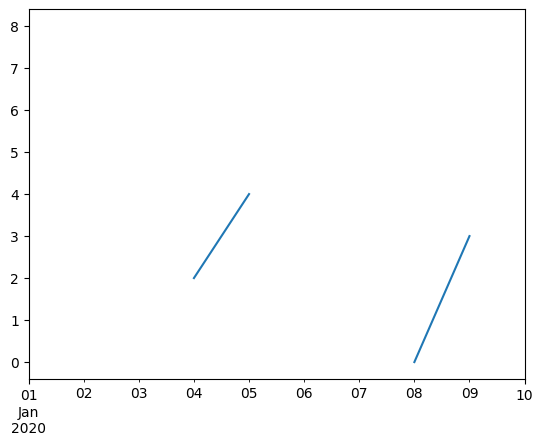

In [262]:
ts.plot()

In [263]:
ts.interpolate()

2020-01-01    8.000000
2020-01-02    6.000000
2020-01-03    4.000000
2020-01-04    2.000000
2020-01-05    4.000000
2020-01-06    2.666667
2020-01-07    1.333333
2020-01-08    0.000000
2020-01-09    3.000000
2020-01-10    3.000000
Freq: D, dtype: float64

<Axes: >

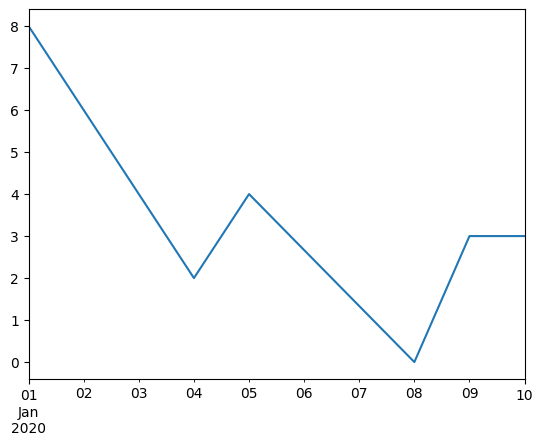

In [264]:
ts.interpolate().plot()

- Interpolation relative to a Timestamp in the DatetimeIndex is available by setting method="time"

In [265]:
ts2 = ts.iloc[[0, 1, 3, 7, 9]]
ts2

2020-01-01    8.0
2020-01-02    NaN
2020-01-04    2.0
2020-01-08    0.0
2020-01-10    NaN
dtype: float64

In [266]:
ts2.interpolate()

2020-01-01    8.0
2020-01-02    5.0
2020-01-04    2.0
2020-01-08    0.0
2020-01-10    0.0
dtype: float64

In [267]:
ts2.interpolate(method="time")

2020-01-01    8.0
2020-01-02    6.0
2020-01-04    2.0
2020-01-08    0.0
2020-01-10    0.0
dtype: float64

- For a floating-point index, use method='values':

In [268]:
idx = [0.0, 1.0, 10.0]
ser = pd.Series([0.0, np.nan, 10.0], idx)
ser

0.0      0.0
1.0      NaN
10.0    10.0
dtype: float64

In [269]:
ser.interpolate()

0.0      0.0
1.0      5.0
10.0    10.0
dtype: float64

In [270]:
ser.interpolate(method="values")

0.0      0.0
1.0      1.0
10.0    10.0
dtype: float64

- If you have scipy installed, you can pass the name of a 1-d interpolation routine to method. as specified in the scipy interpolation documentation and reference guide. The appropriate interpolation method will depend on the data type.
- **Tip**: If you are dealing with a time series that is growing at an increasing rate, use method='barycentric'.

- If you have values approximating a cumulative distribution function, use method='pchip'.

- To fill missing values with goal of smooth plotting use method='akima'.

In [271]:
df = pd.DataFrame(
   {
      "A": [1, 2.1, np.nan, 4.7, 5.6, 6.8],
      "B": [0.25, np.nan, np.nan, 4, 12.2, 14.4],
   }
)
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [272]:
df.interpolate(method="barycentric")

,A,B
0,1.00,0.250
1,2.10,-7.660
2,3.53,-4.515
3,4.70,4.000
4,5.60,12.200
5,6.80,14.400


In [273]:
df.interpolate(method="pchip")

,A,B
0,1.00000,0.250000
1,2.10000,0.672808
2,3.43454,1.928950
3,4.70000,4.000000
4,5.60000,12.200000
5,6.80000,14.400000


In [274]:
df.interpolate(method="akima")

,A,B
0,1.000000,0.250000
1,2.100000,-0.873316
2,3.406667,0.320034
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


- When interpolating via a polynomial or spline approximation, you must also specify the degree or order of the approximation:

In [275]:
df.interpolate(method="spline", order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-0.428598
2,3.404545,1.206900
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [276]:
df.interpolate(method="polynomial", order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-2.703846
2,3.451351,-1.453846
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


<Axes: >

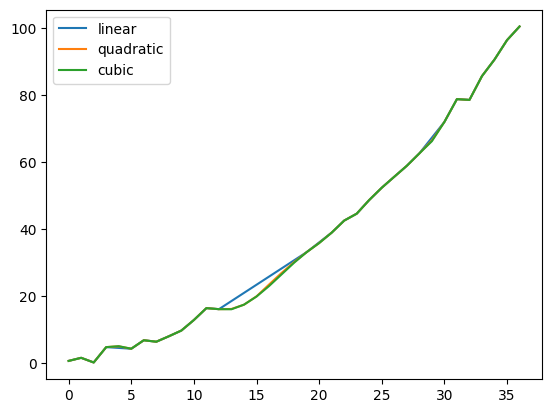

In [277]:
np.random.seed(2)

ser = pd.Series(np.arange(1, 10.1, 0.25) ** 2 + np.random.randn(37))
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])

ser.iloc[missing] = np.nan
methods = ["linear", "quadratic", "cubic"]
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()

- Interpolating new observations from expanding data with Series.reindex().

In [278]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))
# interpolate at new_index
new_index = ser.index.union(pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75]))
interp_s = ser.reindex(new_index).interpolate(method="pchip")
interp_s.loc[49:51]

49.00    0.471410
49.25    0.476841
49.50    0.481780
49.75    0.485998
50.00    0.489266
50.25    0.491814
50.50    0.493995
50.75    0.495763
51.00    0.497074
dtype: float64

#### Interpolation limits
- interpolate() accepts a limit keyword argument to limit the number of consecutive NaN values filled since the last valid observation

In [279]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13, np.nan, np.nan])

ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [280]:
ser.interpolate()

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

In [281]:
ser.interpolate(limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5     NaN
6    13.0
7    13.0
8     NaN
dtype: float64

- By default, NaN values are filled in a forward direction. Use limit_direction parameter to fill backward or from both directions.

In [282]:
ser.interpolate(limit=1, limit_direction="backward")

0     NaN
1     5.0
2     5.0
3     NaN
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [283]:
ser.interpolate(limit=1, limit_direction="both")

0     NaN
1     5.0
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7    13.0
8     NaN
dtype: float64

In [284]:
ser.interpolate(limit_direction="both")

0     5.0
1     5.0
2     5.0
3     7.0
4     9.0
5    11.0
6    13.0
7    13.0
8    13.0
dtype: float64

- By default, NaN values are filled whether they are surrounded by existing valid values or outside existing valid values. The limit_area parameter restricts filling to either inside or outside values.

In [285]:
# fill one consecutive inside value in both directions
ser.interpolate(limit_direction="both", limit_area="inside", limit=1)

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
7     NaN
8     NaN
dtype: float64

In [286]:
# fill all consecutive outside values backward
ser.interpolate(limit_direction="backward", limit_area="outside")

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7     NaN
8     NaN
dtype: float64

In [287]:
# fill all consecutive outside values in both directions
ser.interpolate(limit_direction="both", limit_area="outside")

0     5.0
1     5.0
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
7    13.0
8    13.0
dtype: float64

#### Replacing values
- Series.replace() and DataFrame.replace() can be used similar to Series.fillna() and DataFrame.fillna() to replace or insert missing values.

In [288]:
df = pd.DataFrame(np.eye(3))
df

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [289]:
df_missing = df.replace(0, np.nan)
df_missing

,0,1,2
0,1.0,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,1.0


In [290]:
df_filled = df_missing.replace(np.nan, 2)
df_filled

,0,1,2
0,1.0,2.0,2.0
1,2.0,1.0,2.0
2,2.0,2.0,1.0


- Replacing more than one value is possible by passing a list.

In [291]:
df_filled.replace([1, 44], [2, 28])

,0,1,2
0,2.0,2.0,2.0
1,2.0,2.0,2.0
2,2.0,2.0,2.0


- Replacing using a mapping dict.

In [292]:
df_filled.replace({1: 44, 2: 28})

,0,1,2
0,44.0,28.0,28.0
1,28.0,44.0,28.0
2,28.0,28.0,44.0


#### Regular expression replacement
- **Note**: Python strings prefixed with the r character such as r'hello world' are “raw” strings. They have different semantics regarding backslashes than strings without this prefix. Backslashes in raw strings will be interpreted as an escaped backslash, e.g., r'\' == '\\'.

- Replace the ‘.’ with NaN

In [293]:
d = {"a": list(range(4)), "b": list("ab.."), "c": ["a", "b", np.nan, "d"]}
df = pd.DataFrame(df)
df.replace(",", np.nan)

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


- Replace the ‘.’ with NaN with regular expression that removes surrounding whitespace

In [294]:
df.replace(r"\s*\.\s*", np.nan, regex=True)

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


- Replace with a list of regexes.

In [295]:
df.replace([r"\.", r"(a)"], ["dot", r"\1stuff"], regex=True)

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


- Replace with a regex in a mapping dict.

In [296]:
df.replace({"b": r"\s*\.\s*"}, {"b": np.nan}, regex=True)

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


- Pass nested dictionaries of regular expressions that use the regex keyword.

In [297]:
df.replace({"b": {"b": r""}}, regex=True)

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [298]:
df.replace(regex={"b": {r"\s*\.\s*": np.nan}})

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [299]:
df.replace({"b": r"\s*(\.)\s*"}, {"b": r"\1ty"}, regex=True)

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


- Pass a list of regular expressions that will replace matches with a scalar.

In [300]:
df.replace([r"\s*\.\s*", r"a|b"], "placeholder", regex=True)

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


- All of the regular expression examples can also be passed with the to_replace argument as the regex argument. In this case the value argument must be passed explicitly by name or regex must be a nested dictionary.

In [301]:
df.replace(regex=[r"\s*\.\s*", r"a|b"], value="placeholder")

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


- **Note**: A regular expression object from re.compile is a valid input as well.

#### Duplicate Labels
- From https://pandas.pydata.org/docs/user_guide/duplicates.html
- Index objects are not required to be unique; you can have duplicate row or column labels. This may be a bit confusing at first. If you’re familiar with SQL, you know that row labels are similar to a primary key on a table, and you would never want duplicates in a SQL table. But one of pandas’ roles is to clean messy, real-world data before it goes to some downstream system. And real-world data has duplicates, even in fields that are supposed to be unique.

- This section describes how duplicate labels change the behavior of certain operations, and how prevent duplicates from arising during operations, or to detect them if they do.

#### Consequences of Duplicate Labels
- Some pandas methods (Series.reindex() for example) just don’t work with duplicates present. The output can’t be determined, and so pandas raises.

In [302]:
s1 = pd.Series([0, 1, 2], index=["a", "b", "b"])

# s1.reindex(["a", "b", "c"]) # ValueError

- Other methods, like indexing, can give very surprising results. Typically indexing with a scalar will reduce dimensionality. Slicing a DataFrame with a scalar will return a Series. Slicing a Series with a scalar will return a scalar. But with duplicates, this isn’t the case.

In [303]:
df1 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=["A", "A", "B"])
df1

,A,A,B
0,0,1,2
1,3,4,5


- We have duplicates in the columns. If we slice 'B', we get back a Series

In [304]:
df1["B"]  # a series

0    2
1    5
Name: B, dtype: int64

- But slicing 'A' returns a DataFrame

In [305]:
df1["A"]  # a DataFrame

,A,A
0,0,1
1,3,4


- This applies to row labels as well

In [306]:
df2 = pd.DataFrame({"A": [0, 1, 2]}, index=["a", "a", "b"])
df2

,A
a,0
a,1
b,2


In [307]:
df2.loc["b", "A"]  # a scalar

np.int64(2)

In [308]:
df2.loc["a", "A"]  # a Series

a    0
a    1
Name: A, dtype: int64

#### Duplicate Label Detection
- You can check whether an Index (storing the row or column labels) is unique with Index.is_unique:

In [309]:
df2

,A
a,0
a,1
b,2


In [310]:
df2.index.is_unique

False

In [311]:
df2.columns.is_unique

True

- **Note**: Checking whether an index is unique is somewhat expensive for large datasets. pandas does cache this result, so re-checking on the same index is very fast.

- Index.duplicated() will return a boolean ndarray indicating whether a label is repeated.

In [312]:
df2.index.duplicated()

array([False,  True, False])

- Which can be used as a boolean filter to drop duplicate rows.

In [313]:
df2.loc[~df2.index.duplicated(), :]

,A
a,0
b,2


- If you need additional logic to handle duplicate labels, rather than just dropping the repeats, using groupby() on the index is a common trick. For example, we’ll resolve duplicates by taking the average of all rows with the same label.

In [314]:
df2.groupby(level=0).mean()

,A
a,0.5
b,2.0


#### Disallowing Duplicate Labels

- As noted above, handling duplicates is an important feature when reading in raw data. That said, you may want to avoid introducing duplicates as part of a data processing pipeline (from methods like pandas.concat(), rename(), etc.). Both Series and DataFrame disallow duplicate labels by calling .set_flags(allows_duplicate_labels=False). (the default is to allow them). If there are duplicate labels, an exception will be raised.

In [315]:
#  pd.Series([0, 1, 2], index=["a", "b", "b"]).set_flags(allows_duplicate_labels=False)
# DuplicateLabelError

- This applies to both row and column labels for a DataFrame

In [316]:
pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=["A", "B", "C"],).set_flags(
    allows_duplicate_labels=False
)

,A,B,C
0,0,1,2
1,3,4,5


- This attribute can be checked or set with allows_duplicate_labels, which indicates whether that object can have duplicate labels.

In [317]:
df = pd.DataFrame({"A": [0, 1, 2, 3]}, index=["x", "y", "X", "Y"]).set_flags(
    allows_duplicate_labels=False
)
df

,A
x,0
y,1
X,2
Y,3


In [318]:
df.flags.allows_duplicate_labels

False

- DataFrame.set_flags() can be used to return a new DataFrame with attributes like allows_duplicate_labels set to some value

In [319]:
df2 = df.set_flags(allows_duplicate_labels=True)
df2.flags.allows_duplicate_labels

True

- The new DataFrame returned is a view on the same data as the old DataFrame. Or the property can just be set directly on the same object

In [320]:
df2.flags.allows_duplicate_labels = False
df2.flags.allows_duplicate_labels

False

- When processing raw, messy data you might initially read in the messy data (which potentially has duplicate labels), deduplicate, and then disallow duplicates going forward, to ensure that your data pipeline doesn’t introduce duplicates.

```python
raw = pd.read_csv("...")
deduplicated = raw.groupby(level=0).first()  # remove duplicates
deduplicated.flags.allows_duplicate_labels = False  # disallow going forward
```
- Setting allows_duplicate_labels=False on a Series or DataFrame with duplicate labels or performing an operation that introduces duplicate labels on a Series or DataFrame that disallows duplicates will raise an errors.DuplicateLabelError.

`df.rename(str.upper)`
`# DuplicateLabelError`
- This error message contains the labels that are duplicated, and the numeric positions of all the duplicates (including the “original”) in the Series or DataFrame
#### Duplicate Label Propagation
- In general, disallowing duplicates is “sticky”. It’s preserved through operations.

In [321]:
s1 = pd.Series(0, index=["a", "b"]).set_flags(allows_duplicate_labels=False)

s1

a    0
b    0
dtype: int64

In [322]:
# s1.head().rename({"a": "b"}) # DuplicatLabelError

- **Warning**: This is an experimental feature. Currently, many methods fail to propagate the allows_duplicate_labels value. In future versions it is expected that every method taking or returning one or more DataFrame or Series objects will propagate allows_duplicate_labels.

### Categorical data
- From https://pandas.pydata.org/docs/user_guide/categorical.html
- This is an introduction to pandas categorical data type, including a short comparison with R’s factor.

- Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values (categories; levels in R). Examples are gender, social class, blood type, country affiliation, observation time or rating via Likert scales.

- In contrast to statistical categorical variables, categorical data might have an order (e.g. ‘strongly agree’ vs ‘agree’ or ‘first observation’ vs. ‘second observation’), but numerical operations (additions, divisions, …) are not possible.

- All values of categorical data are either in categories or np.nan. Order is defined by the order of categories, not lexical order of the values. Internally, the data structure consists of a categories array and an integer array of codes which point to the real value in the categories array.

- The categorical data type is useful in the following cases:
    - A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory, see here.
    - The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order, see here.
    - As a signal to other Python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).

### Object creation
#### Series creation
- Categorical Series or columns in a DataFrame can be created in several ways:
- By specifying dtype="category" when constructing a Series:

In [323]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

- By converting an existing Series or column to a category dtype:

In [324]:
df = pd.DataFrame({"A": ["a", "b", "c", "a"]})
df["B"] = df["A"].astype("category")
df

,A,B
0,a,a
1,b,b
2,c,c
3,a,a


- By using special functions, such as cut(), which groups data into discrete bins. See the example on tiling in the docs.

In [325]:
df = pd.DataFrame({"value": np.random.randint(0, 100, 20)})
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
df["group"] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)
df.head(10)

,value,group
0,69,60 - 69
1,52,50 - 59
2,62,60 - 69
3,26,20 - 29
4,83,80 - 89
5,25,20 - 29
6,36,30 - 39
7,15,10 - 19
8,85,80 - 89
9,18,10 - 19


- By passing a pandas.Categorical object to a Series or assigning it to a DataFrame.

In [326]:
raw_cat = pd.Categorical(
    ["a", "b", "c", "a"], categories=["b", "c", "d"], ordered=False
)
s = pd.Series(raw_cat)
s

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): ['b', 'c', 'd']

In [327]:
df = pd.DataFrame({"A": ["a", "b", "c", "a"]})
df["B"] = raw_cat
df

,A,B
0,a,NaN
1,b,b
2,c,c
3,a,NaN


- Categorical data has a specific category dtype:

In [328]:
df.dtypes

A      object
B    category
dtype: object

#### DataFrame creation
- Similar to the previous section where a single column was converted to categorical, all columns in a DataFrame can be batch converted to categorical either during or after construction.

- This can be done during construction by specifying dtype="category" in the DataFrame constructor:

In [329]:
df = pd.DataFrame({"A": list("abca"), "B": list("bccd")}, dtype="category")
df.dtypes

A    category
B    category
dtype: object

- Note that the categories present in each column differ; the conversion is done column by column, so only labels present in a given column are categories:

In [330]:
df["A"]

0    a
1    b
2    c
3    a
Name: A, dtype: category
Categories (3, object): ['a', 'b', 'c']

In [331]:
df["B"]

0    b
1    c
2    c
3    d
Name: B, dtype: category
Categories (3, object): ['b', 'c', 'd']

- Analogously, all columns in an existing DataFrame can be batch converted using DataFrame.astype():

In [332]:
df = pd.DataFrame({"A": list("abca"), "B": list("bccd")})
df_cat = df.astype("category")
df_cat.dtypes

A    category
B    category
dtype: object

- This conversion is likewise done column by column:

In [333]:
df_cat["A"]

0    a
1    b
2    c
3    a
Name: A, dtype: category
Categories (3, object): ['a', 'b', 'c']

In [334]:
df_cat["B"]

0    b
1    c
2    c
3    d
Name: B, dtype: category
Categories (3, object): ['b', 'c', 'd']

#### Controlling behavior
- In the examples above where we passed dtype='category', we used the default behavior:
    - Categories are inferred from the data.
    - Categories are unordered.

- To control those behaviors, instead of passing 'category', use an instance of CategoricalDtype.

In [335]:
from pandas.api.types import CategoricalDtype
s = pd.Series(["a", "b", "c", "a"])
cat_type = CategoricalDtype(categories=["b", "c", "d"], ordered=True)
s_cat = s.astype(cat_type)
s_cat

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): ['b' < 'c' < 'd']

- Similarly, a CategoricalDtype can be used with a DataFrame to ensure that categories are consistent among all columns.

In [336]:
from pandas.api.types import CategoricalDtype
df = pd.DataFrame({"A": list("abca"), "B": list("bccd")})
cat_type = CategoricalDtype(categories=list("abcd"), ordered=True)
df_cat = df.astype(cat_type)
df_cat["A"]

0    a
1    b
2    c
3    a
Name: A, dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

In [337]:
df_cat["B"]

0    b
1    c
2    c
3    d
Name: B, dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

- **Note**: To perform table-wise conversion, where all labels in the entire DataFrame are used as categories for each column, the categories parameter can be determined programmatically by categories = pd.unique(df.to_numpy().ravel()).

- If you already have codes and categories, you can use the from_codes() constructor to save the factorize step during normal constructor mode:

In [338]:
splitter = np.random.choice([0, 1], 5, p=[0.5, 0.5])
s = pd.Series(pd.Categorical.from_codes(splitter, categories=["train", "test"]))


#### Regaining original data
- To get back to the original Series or NumPy array, use Series.astype(original_dtype) or np.asarray(categorical):

In [339]:
s = pd.Series(["a", "b", "c", "a"])
s

0    a
1    b
2    c
3    a
dtype: object

In [340]:
s2 = s.astype("category")
s2

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [341]:
s2.astype(str)

0    a
1    b
2    c
3    a
dtype: object

In [342]:
np.asarray(s2)

array(['a', 'b', 'c', 'a'], dtype=object)

- **Note**: In contrast to R’s factor function, categorical data is not converting input values to strings; categories will end up the same data type as the original values.

- **Note**: In contrast to R’s factor function, there is currently no way to assign/change labels at creation time. Use categories to change the categories after creation time.

#### CategoricalDtype
- A categorical’s type is fully described by
    - categories: a sequence of unique values and no missing values
    - ordered: a boolean
- This information can be stored in a CategoricalDtype. The categories argument is optional, which implies that the actual categories should be inferred from whatever is present in the data when the pandas.Categorical is created. The categories are assumed to be unordered by default.

In [343]:
from pandas.api.types import CategoricalDtype

CategoricalDtype(["a", "b", "c"])


CategoricalDtype(categories=['a', 'b', 'c'], ordered=False, categories_dtype=object)

In [344]:
CategoricalDtype(["a", "b", "c"], ordered=True)


CategoricalDtype(categories=['a', 'b', 'c'], ordered=True, categories_dtype=object)

In [345]:
CategoricalDtype()

CategoricalDtype(categories=None, ordered=False, categories_dtype=None)

- A CategoricalDtype can be used in any place pandas expects a dtype. For example pandas.read_csv(), pandas.DataFrame.astype(), or in the Series constructor.

- **Note**: As a convenience, you can use the string 'category' in place of a CategoricalDtype when you want the default behavior of the categories being unordered, and equal to the set values present in the array. In other words, dtype='category' is equivalent to dtype=CategoricalDtype().

#### Equality semantics
- Two instances of CategoricalDtype compare equal whenever they have the same categories and order. When comparing two unordered categoricals, the order of the categories is not considered.

In [346]:
c1 = CategoricalDtype(["a", "b", "c"], ordered=False)


In [347]:
# Equal, since order is not considered when ordered=False
c1 == CategoricalDtype(["b", "c", "a"], ordered=False)

True

In [348]:
# Unequal, since the second CategoricalDtype is ordered
c1 == CategoricalDtype(["a", "b", "c"], ordered=True)

False

- All instances of CategoricalDtype compare equal to the string 'category'.

In [349]:
c1 == "category"

True

#### Description
- Using describe() on categorical data will produce similar output to a Series or DataFrame of type string.

In [350]:
cat = pd.Categorical(["a", "c", "c", np.nan], categories=["b", "a", "c"])
df = pd.DataFrame({"cat": cat, "s": ["a", "c", "c", np.nan]})
df.describe()

,cat,s
count,3,3
unique,2,2
top,c,c
freq,2,2


In [351]:
df["cat"].describe()

count     3
unique    2
top       c
freq      2
Name: cat, dtype: object

#### Working with categories
- Categorical data has a categories and a ordered property, which list their possible values and whether the ordering matters or not. These properties are exposed as s.cat.categories and s.cat.ordered. If you don’t manually specify categories and ordering, they are inferred from the passed arguments.

In [352]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
s.cat.categories

Index(['a', 'b', 'c'], dtype='object')

In [353]:
s.cat.ordered

False

- It’s also possible to pass in the categories in a specific order:

In [354]:
s = pd.Series(pd.Categorical(["a", "b", "c", "a"], categories=["c", "b", "a"]))

s.cat.categories

Index(['c', 'b', 'a'], dtype='object')

In [355]:
s.cat.ordered

False

- **Note**: New categorical data are not automatically ordered. You must explicitly pass ordered=True to indicate an ordered Categorical.
- **Note**: The result of unique() is not always the same as Series.cat.categories, because Series.unique() has a couple of guarantees, namely that it returns categories in the order of appearance, and it only includes values that are actually present.

In [356]:
s = pd.Series(list("babc")).astype(CategoricalDtype(list("abcd")))
s

0    b
1    a
2    b
3    c
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [357]:
s.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [358]:
s.unique()

['b', 'a', 'c']
Categories (4, object): ['a', 'b', 'c', 'd']

#### Renaming categories
- Renaming categories is done by using the rename_categories() method:

In [359]:
s = pd.Series(["a", "b", "c", "a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [360]:
new_categories = ["Group %s" % g for g in s.cat.categories]
s = s.cat.rename_categories(new_categories)
s

0    Group a
1    Group b
2    Group c
3    Group a
dtype: category
Categories (3, object): ['Group a', 'Group b', 'Group c']

In [361]:
# You can also pass a dict-like object to map the renaming
s = s.cat.rename_categories({1: "x", 2: "y", 3: "z"})
s

0    Group a
1    Group b
2    Group c
3    Group a
dtype: category
Categories (3, object): ['Group a', 'Group b', 'Group c']

- **Note**: In contrast to R’s factor, categorical data can have categories of other types than string.

- Categories must be unique or a ValueError is raised:

In [362]:
try:
    s = s.cat.rename_categories([1, 1, 1])
except ValueError as e:
    print("ValueError:", str(e))

ValueError: Categorical categories must be unique


- Categories must also not be NaN or a ValueError is raised:

In [363]:
try:
    s = s.cat.rename_categories([1, 2, np.nan])
except ValueError as e:
    print("ValueError:", str(e))

ValueError: Categorical categories cannot be null


#### Appending new categories
- Appending categories can be done by using the add_categories() method:

In [364]:
s = s.cat.add_categories([4])
s.cat.categories

Index(['Group a', 'Group b', 'Group c', 4], dtype='object')

In [365]:
s

0    Group a
1    Group b
2    Group c
3    Group a
dtype: category
Categories (4, object): ['Group a', 'Group b', 'Group c', 4]

#### Removing categories
- Removing categories can be done by using the remove_categories() method. Values which are removed are replaced by np.nan.:

In [366]:
s = s.cat.remove_categories([4])
s

0    Group a
1    Group b
2    Group c
3    Group a
dtype: category
Categories (3, object): ['Group a', 'Group b', 'Group c']

#### Removing unused categories
- Removing unused categories can also be done:

In [367]:
s = pd.Series(pd.Categorical(["a", "b", "a"], categories=["a", "b", "c", "d"]))
s

0    a
1    b
2    a
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [368]:
s.cat.remove_unused_categories()

0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']

#### Setting categories
- If you want to do remove and add new categories in one step (which has some speed advantage), or simply set the categories to a predefined scale, use set_categories().

In [369]:
s = pd.Series(["one", "two", "four", "-"], dtype="category")
s

0     one
1     two
2    four
3       -
dtype: category
Categories (4, object): ['-', 'four', 'one', 'two']

In [370]:
s = s.cat.set_categories(["one", "two", "three", "four"])
s

0     one
1     two
2    four
3     NaN
dtype: category
Categories (4, object): ['one', 'two', 'three', 'four']

- **Note**: Be aware that Categorical.set_categories() cannot know whether some category is omitted intentionally or because it is misspelled or (under Python3) due to a type difference (e.g., NumPy S1 dtype and Python strings). This can result in surprising behaviour!

#### Sorting and order
- If categorical data is ordered (s.cat.ordered == True), then the order of the categories has a meaning and certain operations are possible. If the categorical is unordered, .min()/.max() will raise a TypeError.

In [371]:
s = pd.Series(pd.Categorical(["a", "b", "c", "a"], ordered=False))
s = s.sort_values()
s = pd.Series(["a", "b", "c", "a"]).astype(CategoricalDtype(ordered=True))
s = s.sort_values()
s

0    a
3    a
1    b
2    c
dtype: category
Categories (3, object): ['a' < 'b' < 'c']

In [372]:
s.min(), s.max()

('a', 'c')

- You can set categorical data to be ordered by using as_ordered() or unordered by using as_unordered(). These will by default return a new object.

In [373]:
s.cat.as_ordered()

0    a
3    a
1    b
2    c
dtype: category
Categories (3, object): ['a' < 'b' < 'c']

In [374]:
s.cat.as_unordered()

0    a
3    a
1    b
2    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

- Sorting will use the order defined by categories, not any lexical order present on the data type. This is even true for strings and numeric data:

In [375]:
s = pd.Series([1, 2, 3, 1], dtype="category")
s = s.cat.set_categories([2, 3, 1], ordered=True)
s

0    1
1    2
2    3
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

In [376]:
s = s.sort_values()
s

1    2
2    3
0    1
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

In [377]:
s.min(), s.max()

(np.int64(2), np.int64(1))

#### Reordering
- Reordering the categories is possible via the Categorical.reorder_categories() and the Categorical.set_categories() methods. For Categorical.reorder_categories(), all old categories must be included in the new categories and no new categories are allowed. This will necessarily make the sort order the same as the categories order.

In [378]:
s = pd.Series([1, 2, 3, 1], dtype="category")
s = s.cat.reorder_categories([2, 3, 1], ordered=True)
s

0    1
1    2
2    3
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

In [379]:
s = s.sort_values()
s

1    2
2    3
0    1
3    1
dtype: category
Categories (3, int64): [2 < 3 < 1]

In [380]:
s.min(), s.max()

(np.int64(2), np.int64(1))

- **Note**: Note the difference between assigning new categories and reordering the categories: the first renames categories and therefore the individual values in the Series, but if the first position was sorted last, the renamed value will still be sorted last. Reordering means that the way values are sorted is different afterwards, but not that individual values in the Series are changed.
- **Note**: If the Categorical is not ordered, Series.min() and Series.max() will raise TypeError. Numeric operations like +, -, *, / and operations based on them (e.g. Series.median(), which would need to compute the mean between two values if the length of an array is even) do not work and raise a TypeError.

#### Multi column sorting
- A categorical dtyped column will participate in a multi-column sort in a similar manner to other columns. The ordering of the categorical is determined by the categories of that column.

In [381]:
dfs = pd.DataFrame(
    {
        "A": pd.Categorical(
            list("bbeebbaa"),
            categories=["e", "a", "b"],
            ordered=True,
        ),
        "B": [1, 2, 1, 2, 2, 1, 2, 1],
    }
)

dfs.sort_values(by=["A", "B"])

,A,B
2,e,1
3,e,2
7,a,1
6,a,2
0,b,1
5,b,1
1,b,2
4,b,2


- Reordering the categories changes a future sort.

In [382]:
dfs["A"] = dfs["A"].cat.reorder_categories(["a", "b", "e"])
dfs.sort_values(by=["A", "B"])

,A,B
7,a,1
6,a,2
0,b,1
5,b,1
1,b,2
4,b,2
2,e,1
3,e,2


#### Comparisons
- Comparing categorical data with other objects is possible in three cases:
    - Comparing equality (== and !=) to a list-like object (list, Series, array, …) of the same length as the categorical data.
    - All comparisons (==, !=, >, >=, <, and <=) of categorical data to another categorical Series, when ordered==True and the categories are the same.
    - All comparisons of a categorical data to a scalar.

- All other comparisons, especially “non-equality” comparisons of two categoricals with different categories or a categorical with any list-like object, will raise a TypeError.

- **Note**: Any “non-equality” comparisons of categorical data with a Series, np.array, list or categorical data with different categories or ordering will raise a TypeError because custom categories ordering could be interpreted in two ways: one with taking into account the ordering and one without.

In [383]:
cat = pd.Series([1, 2, 3]).astype(CategoricalDtype([3, 2, 1], ordered=True))
cat_base = pd.Series([2, 2, 2]).astype(CategoricalDtype([3, 2, 1], ordered=True))
cat_base2 = pd.Series([2, 2, 2]).astype(CategoricalDtype(ordered=True))

cat

0    1
1    2
2    3
dtype: category
Categories (3, int64): [3 < 2 < 1]

In [384]:
cat_base

0    2
1    2
2    2
dtype: category
Categories (3, int64): [3 < 2 < 1]

In [385]:
cat_base2

0    2
1    2
2    2
dtype: category
Categories (1, int64): [2]

- Comparing to a categorical with the same categories and ordering or to a scalar works:



In [386]:
cat > cat_base

0     True
1    False
2    False
dtype: bool

In [387]:
cat > 2

0     True
1    False
2    False
dtype: bool

- Equality comparisons work with any list-like object of same length and scalars:

In [388]:
cat == cat_base

0    False
1     True
2    False
dtype: bool

In [389]:
cat == np.array([1, 2, 3])

0    True
1    True
2    True
dtype: bool

In [390]:
cat == 2

0    False
1     True
2    False
dtype: bool

- This doesn’t work because the categories are not the same:

In [391]:
try:
    cat > cat_base2
except TypeError as e:
    print("TypeError:", str(e))

TypeError: Categoricals can only be compared if 'categories' are the same.


- If you want to do a “non-equality” comparison of a categorical series with a list-like object which is not categorical data, you need to be explicit and convert the categorical data back to the original values:

In [392]:
base = np.array([1, 2, 3])
try:
    cat > base
except TypeError as e:
    print("TypeError:", str(e))

TypeError: Cannot compare a Categorical for op __gt__ with type <class 'numpy.ndarray'>.
If you want to compare values, use 'np.asarray(cat) <op> other'.


In [393]:
np.asarray(cat) > base

array([False, False, False])

- When you compare two unordered categoricals with the same categories, the order is not considered:



In [394]:
c1 = pd.Categorical(["a", "b"], categories=["a", "b"], ordered=False)
c2 = pd.Categorical(["a", "b"], categories=["b", "a"], ordered=False)
c1 == c2

array([ True,  True])

#### Operations
- Apart from Series.min(), Series.max() and Series.mode(), the following operations are possible with categorical data:

- Series methods like Series.value_counts() will use all categories, even if some categories are not present in the data:

In [395]:
s = pd.Series(pd.Categorical(["a", "b", "c", "c"], categories=["c", "a", "b", "d"]))

s.value_counts()

c    2
a    1
b    1
d    0
Name: count, dtype: int64

- DataFrame methods like DataFrame.sum() also show “unused” categories when observed=False.



In [396]:
columns = pd.Categorical(
    ["One", "One", "Two"], categories=["One", "Two", "Three"], ordered=True
)
df = pd.DataFrame(
    data=[[1, 2, 3], [4, 5, 6]],
    columns=pd.MultiIndex.from_arrays([["A", "B", "B"], columns]),
).T

df.groupby(level=1, observed=False).sum()


,0,1
One,3,9
Two,3,6
Three,0,0


- Groupby will also show “unused” categories when observed=False:

In [397]:
cats = pd.Categorical(
    ["a", "b", "b", "b", "c", "c", "c"], categories=["a", "b", "c", "d"]
)

df = pd.DataFrame({"cats": cats, "values": [1, 2, 2, 2, 3, 4, 5]})

df.groupby("cats", observed=False).mean()


,values
cats,
a,1.0
b,2.0
c,4.0
d,NaN


In [398]:
cats2 = pd.Categorical(["a", "a", "b", "b"], categories=["a", "b", "c"])

df2 = pd.DataFrame(
    {
        "cats": cats2,
        "B": ["c", "d", "c", "d"],
        "values": [1, 2, 3, 4],
    }
)
df2.groupby(["cats", "B"], observed=False).mean()


values
cats B        
a    c     1.0
     d     2.0
b    c     3.0
     d     4.0
c    c     NaN
     d     NaN

- Pivot tables:

In [399]:
raw_cat = pd.Categorical(["a", "a", "b", "b"], categories=["a", "b", "c"])

df = pd.DataFrame({"A": raw_cat, "B": ["c", "d", "c", "d"], "values": [1, 2, 3, 4]})

pd.pivot_table(df, values="values", index=["A", "B"], observed=False)


values
A B        
a c     1.0
  d     2.0
b c     3.0
  d     4.0

#### Data munging
- The optimized pandas data access methods .loc, .iloc, .at, and .iat, work as normal. The only difference is the return type (for getting) and that only values already in categories can be assigned.

#### Getting
- If the slicing operation returns either a DataFrame or a column of type Series, the category dtype is preserved.

In [400]:
idx = pd.Index(["h", "i", "j", "k", "l", "m", "n"])
cats = pd.Series(["a", "b", "b", "b", "c", "c", "c"], dtype="category", index=idx)
values = [1, 2, 2, 2, 3, 4, 5]

df = pd.DataFrame({"cats": cats, "values": values}, index=idx)
df.iloc[2:4, :]



,cats,values
j,b,2
k,b,2


In [401]:
df.iloc[2:4, :].dtypes


cats      category
values       int64
dtype: object

In [402]:
df.loc["h":"j", "cats"]


h    a
i    b
j    b
Name: cats, dtype: category
Categories (3, object): ['a', 'b', 'c']

In [403]:
df[df["cats"] == "b"]


,cats,values
i,b,2
j,b,2
k,b,2


- An example where the category type is not preserved is if you take one single row: the resulting Series is of dtype object:

In [404]:
# get the complete "h" row as a Series
df.loc["h", :]

cats      a
values    1
Name: h, dtype: object

- Returning a single item from categorical data will also return the value, not a categorical of length “1”.



In [405]:
df.iat[0, 0]


'a'

In [406]:
df["cats"] = df["cats"].cat.rename_categories(["x", "y", "z"])
df.at["h", "cats"]  # returns a string


'x'

- **Note**: The is in contrast to R’s factor function, where factor(c(1,2,3))[1] returns a single value factor.

- To get a single value Series of type category, you pass in a list with a single value:

In [407]:
df.loc[["h"], "cats"]


h    x
Name: cats, dtype: category
Categories (3, object): ['x', 'y', 'z']

#### String and datetime accessors
- The accessors .dt and .str will work if the s.cat.categories are of an appropriate type:

In [408]:
str_s = pd.Series(list("aabb"))
str_cat = str_s.astype("category")
str_cat

0    a
1    a
2    b
3    b
dtype: category
Categories (2, object): ['a', 'b']

In [409]:
str_cat.str.contains("a")

0     True
1     True
2    False
3    False
dtype: bool

In [410]:
date_s = pd.Series(pd.date_range("1/1/2015", periods=5))
date_cat = date_s.astype("category")

date_cat


0   2015-01-01
1   2015-01-02
2   2015-01-03
3   2015-01-04
4   2015-01-05
dtype: category
Categories (5, datetime64[ns]): [2015-01-01, 2015-01-02, 2015-01-03, 2015-01-04, 2015-01-05]

In [411]:
date_cat.dt.day


0    1
1    2
2    3
3    4
4    5
dtype: int32

- **Note**: The returned Series (or DataFrame) is of the same type as if you used the .str.<method> / .dt.<method> on a Series of that type (and not of type category!).

- That means, that the returned values from methods and properties on the accessors of a Series and the returned values from methods and properties on the accessors of this Series transformed to one of type category will be equal:

In [412]:
ret_s = str_s.str.contains("a")
ret_cat = str_cat.str.contains("a")
ret_s.dtype == ret_cat.dtype


True

In [413]:
ret_s == ret_cat


0    True
1    True
2    True
3    True
dtype: bool

- **Note**: The work is done on the categories and then a new Series is constructed. This has some performance implication if you have a Series of type string, where lots of elements are repeated (i.e. the number of unique elements in the Series is a lot smaller than the length of the Series). In this case it can be faster to convert the original Series to one of type category and use .str.<method> or .dt.<property> on that.

#### Setting
- Setting values in a categorical column (or Series) works as long as the value is included in the categories:

In [414]:
idx = pd.Index(["h", "i", "j", "k", "l", "m", "n"])
cats = pd.Categorical(["a", "a", "a", "a", "a", "a", "a"], categories=["a", "b"])
values = [1, 1, 1, 1, 1, 1, 1]
df = pd.DataFrame({"cats": cats, "values": values}, index=idx)
df.iloc[2:4, :] = [["b", 2], ["b", 2]]

df


,cats,values
h,a,1
i,a,1
j,b,2
k,b,2
l,a,1
m,a,1
n,a,1


In [415]:
try:
    df.iloc[2:4, :] = [["c", 3], ["c", 3]]
except TypeError as e:
    print("TypeError:", str(e))

TypeError: Cannot setitem on a Categorical with a new category, set the categories first


- Setting values by assigning categorical data will also check that the categories match:



In [416]:
df.loc["j":"k", "cats"] = pd.Categorical(["a", "a"], categories=["a", "b"])
df

,cats,values
h,a,1
i,a,1
j,a,2
k,a,2
l,a,1
m,a,1
n,a,1


In [417]:
try:
    df.loc["j":"k", "cats"] = pd.Categorical(["b", "b"], categories=["a", "b", "c"])
except TypeError as e:
    print("TypeError:", str(e))

TypeError: Cannot set a Categorical with another, without identical categories


- Assigning a Categorical to parts of a column of other types will use the values:

In [418]:
df = pd.DataFrame({"a": [1, 1, 1, 1, 1], "b": ["a", "a", "a", "a", "a"]})
df.loc[1:2, "a"] = pd.Categorical(["b", "b"], categories=["a", "b"])
df.loc[2:3, "b"] = pd.Categorical(["b", "b"], categories=["a", "b"])
df


C:\Users\thotc\AppData\Local\Temp\ipykernel_39356\2814635084.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['b', 'b']
Categories (2, object): ['a', 'b']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[1:2, "a"] = pd.Categorical(["b", "b"], categories=["a", "b"])


,a,b
0,1,a
1,b,a
2,b,b
3,1,b
4,1,a


In [419]:
df.dtypes

a    object
b    object
dtype: object

#### Merging / concatenation
- By default, combining Series or DataFrames which contain the same categories results in category dtype, otherwise results will depend on the dtype of the underlying categories. Merges that result in non-categorical dtypes will likely have higher memory usage. Use .astype or union_categoricals to ensure category results.

In [420]:
from pandas.api.types import union_categoricals
# same categories
s1 = pd.Series(["a", "b"], dtype="category")

s2 = pd.Series(["a", "b", "a"], dtype="category")

pd.concat([s1, s2])

0    a
1    b
0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']

In [421]:
# different categories
s3 = pd.Series(["b", "c"], dtype="category")
pd.concat([s1, s3])


0    a
1    b
0    b
1    c
dtype: object

In [422]:
# Output dtype is inferred based on categories values
int_cats = pd.Series([1, 2], dtype="category")
float_cats = pd.Series([3.0, 4.0], dtype="category")
pd.concat([int_cats, float_cats])


0    1.0
1    2.0
0    3.0
1    4.0
dtype: float64

In [423]:
pd.concat([s1, s3]).astype("category")


0    a
1    b
0    b
1    c
dtype: category
Categories (3, object): ['a', 'b', 'c']

In [424]:
union_categoricals([s1.array, s3.array])

['a', 'b', 'b', 'c']
Categories (3, object): ['a', 'b', 'c']

- The following table summarizes the results of merging Categoricals:

| arg1 | arg2 | identical | result |
| ----- | ---- | -------- | ------ |
| category | category | True | category |
| category (object) | category (object) | False | object (dtype is inferred) | | category (int) | category (float) | False | float (dtype is inferred) | 
#### Unioning 
- If you want to combine categoricals that do not necessarily have the same categories, the union_categoricals() function will combine a list-like of categoricals. The new categories will be the union of the categories being combined.

In [425]:
from pandas.api.types import union_categoricals

a = pd.Categorical(["b", "c"])
b = pd.Categorical(["a", "b"])
union_categoricals([a, b])



['b', 'c', 'a', 'b']
Categories (3, object): ['b', 'c', 'a']

- By default, the resulting categories will be ordered as they appear in the data. If you want the categories to be lexsorted, use sort_categories=True argument.

In [426]:
union_categoricals([a, b], sort_categories=True)

['b', 'c', 'a', 'b']
Categories (3, object): ['a', 'b', 'c']

- union_categoricals also works with the “easy” case of combining two categoricals of the same categories and order information (e.g. what you could also append for).

In [427]:
a = pd.Categorical(["a", "b"], ordered=True)
b = pd.Categorical(["a", "b", "a"], ordered=True)
union_categoricals([a, b])

['a', 'b', 'a', 'b', 'a']
Categories (2, object): ['a' < 'b']

- The below raises TypeError because the categories are ordered and not identical.

In [430]:
a = pd.Categorical(["a", "b"], ordered=True)

b = pd.Categorical(["a", "b", "c"], ordered=True)

try:
    union_categoricals([a, b])
except TypeError as e:
    print(e)

to union ordered Categoricals, all categories must be the same


- Ordered categoricals with different categories or orderings can be combined by using the ignore_ordered=True argument.

In [431]:
a = pd.Categorical(["a", "b", "c"], ordered=True)
b = pd.Categorical(["c", "b", "a"], ordered=True)
union_categoricals([a, b], ignore_order=True)


['a', 'b', 'c', 'c', 'b', 'a']
Categories (3, object): ['a', 'b', 'c']

- union_categoricals() also works with a CategoricalIndex, or Series containing categorical data, but note that the resulting array will always be a plain Categorical:

In [432]:
a = pd.Series(["b", "c"], dtype="category")
b = pd.Series(["a", "b"], dtype="category")
union_categoricals([a, b])


['b', 'c', 'a', 'b']
Categories (3, object): ['b', 'c', 'a']

- **Note**: union_categoricals may recode the integer codes for categories when combining categoricals. This is likely what you want, but if you are relying on the exact numbering of the categories, be aware.

In [433]:
c1 = pd.Categorical(["b", "c"])
c2 = pd.Categorical(["a", "b"])
c1

['b', 'c']
Categories (2, object): ['b', 'c']

In [434]:
# "b" is coded to 0
c1.codes

array([0, 1], dtype=int8)

In [435]:
c2

['a', 'b']
Categories (2, object): ['a', 'b']

In [436]:
# "b" is coded to 1
c2.codes

array([0, 1], dtype=int8)

In [437]:
c = union_categoricals([c1, c2])
c

['b', 'c', 'a', 'b']
Categories (3, object): ['b', 'c', 'a']

In [438]:
# "b" is coded to 0 throughout, same as c1, different from c2
c.codes

array([0, 1, 2, 0], dtype=int8)

#### Getting data in/out
- You can write data that contains category dtypes to a HDFStore. See here for an example and caveats.

- It is also possible to write data to and reading data from Stata format files. See here for an example and caveats.

- Writing to a CSV file will convert the data, effectively removing any information about the categorical (categories and ordering). So if you read back the CSV file you have to convert the relevant columns back to category and assign the right categories and categories ordering.

In [439]:
import io

s = pd.Series(pd.Categorical(["a", "b", "b", "a", "a", "d"]))

# rename the categories
s = s.cat.rename_categories(["very good", "good", "bad"])

# reorder the categories and add missing categories
s = s.cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df = pd.DataFrame({"cats": s, "vals": [1, 2, 3, 4, 5, 6]})

csv = io.StringIO()

df.to_csv(csv)

df2 = pd.read_csv(io.StringIO(csv.getvalue()))


df2.dtypes

Unnamed: 0     int64
cats          object
vals           int64
dtype: object

In [440]:
df2["cats"]

0    very good
1         good
2         good
3    very good
4    very good
5          bad
Name: cats, dtype: object

In [442]:
# Redo the category
df2["cats"] = df2["cats"].astype("category")
df2["cats"] = df2["cats"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [443]:
df2.dtypes

Unnamed: 0       int64
cats          category
vals             int64
dtype: object

In [444]:
df2["cats"]

0    very good
1         good
2         good
3    very good
4    very good
5          bad
Name: cats, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

- The same holds for writing to a SQL database with to_sql.
#### Missing data
- pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

- Missing values should not be included in the Categorical’s categories, only in the values. Instead, it is understood that NaN is different, and is always a possibility. When working with the Categorical’s codes, missing values will always have a code of -1.

In [445]:
s = pd.Series(["a", "b", np.nan, "a"], dtype="category")
# only two categories
s


0      a
1      b
2    NaN
3      a
dtype: category
Categories (2, object): ['a', 'b']

In [446]:
s.cat.codes

0    0
1    1
2   -1
3    0
dtype: int8

- Methods for working with missing data, e.g. isna(), fillna(), dropna(), all work normally:

In [447]:
s = pd.Series(["a", "b", np.nan], dtype="category")
s

0      a
1      b
2    NaN
dtype: category
Categories (2, object): ['a', 'b']

In [448]:
pd.isna(s)

0    False
1    False
2     True
dtype: bool

In [449]:
s.fillna("a")

0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']

#### Differences to R’s factor
- The following differences to R’s factor functions can be observed:
    - R’s levels are named categories.
    - R’s levels are always of type string, while categories in pandas can be of any dtype.
    - It’s not possible to specify labels at creation time. Use s.cat.rename_categories(new_labels) afterwards.
    - In contrast to R’s factor function, using categorical data as the sole input to create a new categorical series will not remove unused categories but create a new categorical series which is equal to the passed in one!
    - R allows for missing values to be included in its levels (pandas’ categories). pandas does not allow NaN categories, but missing values can still be in the values.
### Gotchas
#### Memory usage
- The memory usage of a Categorical is proportional to the number of categories plus the length of the data. In contrast, an object dtype is a constant times the length of the data.

In [450]:
s = pd.Series(["foo", "bar"] * 1000)
s.nbytes

16000

In [451]:
# category dtype
s.astype("category").nbytes

2016

- **Note**: If the number of categories approaches the length of the data, the Categorical will use nearly the same or more memory than an equivalent object dtype representation.

In [452]:
s = pd.Series(["foo%04d" % i for i in range(2000)])
s.nbytes

16000

In [453]:
s.astype("category").nbytes

20000

#### Categorical is not a numpy array
- Currently, categorical data and the underlying Categorical is implemented as a Python object and not as a low-level NumPy array dtype. This leads to some problems.

- NumPy itself doesn’t know about the new dtype:

In [454]:
try:
    np.dtype("category")
except TypeError as e:
    print("TypeError:", str(e))

TypeError: data type 'category' not understood


In [455]:
dtype = pd.Categorical(["a"]).dtype
try:
    np.dtype(dtype)
except TypeError as e:
    print("TypeError:", str(e))

TypeError: Cannot interpret 'CategoricalDtype(categories=['a'], ordered=False, categories_dtype=object)' as a data type


- Dtype comparisons work:

In [456]:
dtype == np.str_

False

In [457]:
np.str_ == dtype

False

- To check if a Series contains Categorical data, use hasattr(s, 'cat'):

In [458]:
hasattr(pd.Series(["a"], dtype="category"), "cat")

True

In [459]:
hasattr(pd.Series(["a"]), "cat")

False

- Using NumPy functions on a Series of type category should not work as Categoricals are not numeric data (even in the case that .categories is numeric).

In [460]:
s = pd.Series(pd.Categorical([1, 2, 3, 4]))
try:
    np.sum(s)
except TypeError as e:
    print("TypeError:", str(e))

TypeError: 'Categorical' with dtype category does not support reduction 'sum'


#### dtype in apply
- pandas currently does not preserve the dtype in apply functions: If you apply along rows you get a Series of object dtype (same as getting a row -> getting one element will return a basic type) and applying along columns will also convert to object. NaN values are unaffected. You can use fillna to handle missing values before applying a function.

In [461]:
df = pd.DataFrame(
    {
        "a": [1, 2, 3, 4],
        "b": ["a", "b", "c", "d"],
        "cats": pd.Categorical([1, 2, 3, 2]),
    }
)

df.apply(lambda row: type(row["cats"]), axis=1)

0    <class 'int'>
1    <class 'int'>
2    <class 'int'>
3    <class 'int'>
dtype: object

In [462]:
df.apply(lambda col: col.dtype, axis=0)


a          int64
b         object
cats    category
dtype: object

#### Categorical index
- CategoricalIndex is a type of index that is useful for supporting indexing with duplicates. This is a container around a Categorical and allows efficient indexing and storage of an index with a large number of duplicated elements. See the advanced indexing docs for a more detailed explanation.

- Setting the index will create a CategoricalIndex:

In [463]:
cats = pd.Categorical([1, 2, 3, 4], categories=[4, 2, 3, 1])
strings = ["a", "b", "c", "d"]
values = [4, 2, 3, 1]
df = pd.DataFrame({"strings": strings, "values": values}, index=cats)
df.index


CategoricalIndex([1, 2, 3, 4], categories=[4, 2, 3, 1], ordered=False, dtype='category')

In [464]:
# This now sorts by the categories order
df.sort_index()

,strings,values
4,d,1
2,b,2
3,c,3
1,a,4


#### Side effects
- Constructing a Series from a Categorical will not copy the input Categorical. This means that changes to the Series will in most cases change the original Categorical:

In [465]:
cat = pd.Categorical([1, 2, 3, 10], categories=[1, 2, 3, 4, 10])
s = pd.Series(cat, name="cat")
cat

[1, 2, 3, 10]
Categories (5, int64): [1, 2, 3, 4, 10]

In [466]:
s.iloc[0:2] = 10
cat

[10, 10, 3, 10]
Categories (5, int64): [1, 2, 3, 4, 10]

- Use copy=True to prevent such a behaviour or simply don’t reuse Categoricals:

In [467]:
cat = pd.Categorical([1, 2, 3, 10], categories=[1, 2, 3, 4, 10])
s = pd.Series(cat, name="cat", copy=True)
cat

[1, 2, 3, 10]
Categories (5, int64): [1, 2, 3, 4, 10]

In [468]:
s.iloc[0:2] = 10
cat

[1, 2, 3, 10]
Categories (5, int64): [1, 2, 3, 4, 10]

- **Note**: This also happens in some cases when you supply a NumPy array instead of a Categorical: using an int array (e.g. np.array([1,2,3,4])) will exhibit the same behavior, while using a string array (e.g. np.array(["a","b","c","a"])) will not.